# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from scipy.stats import zscore

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path=('/content/drive/MyDrive/Project7/stock_data.csv')
stock_data=pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [ ]:
stocks=stock_data.copy()

In [ ]:
stocks.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

#### Observation

  - All features loaded correctly as indicated in the problem statement

In [ ]:
stocks.shape

(340, 15)

#### Observation

  - Data is made up of 340 rows and 15 columns

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Observation

  - The data is made up of 11 numerical data types and 4 object data types

In [ ]:
stocks.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

#### Observation

  - GICS Sector has 11 unique items with Industrials accounting for 53 records
  - GICS Sub Industry have 104 unique tems with Oil & Gas Exploration & Production been the most frequent
  - Current Price ranges from 4.5 to 1274.95 with mean of 80.86 and standard deviation of 98.06
  - Price Change ranges from -47.13 to 55.05, recording mean and standard deviation of 4.078 and 12.01 respectively.
  - Volatility ranges from 0.733 to 4.58, mean of 1.53 and standard deviation of 0.59
  - ROE ranges from 1.0 to 917.0, mean of 39.597 and standard deviation of 96.55
  - Cash Ratio ranges from 0.0 to 958.0 with mean of 70.02 and standard deviation of 90.42
  - Net Cash Flow ranges from -11208000000.0 to 20764000000.0, mean of 55537620.588235 and standard deviation of 1946365312.175789
  - Net Income ranges from -23528000000.0 to 24442000000.0, mean of 1494384602.941176 and standard deviation of 3940150279.327936
  - Earnings Per Share ranges from -61.2 to 50.09, mean of 2.776662 and standard deviation of	6.587779
  - Estimated Shares Outstanding ranges from 27672156.86 to 6159292035.0, mean of 577028337.75403 and standard deviation of 845849595.417695
  - P/E Ratio ranges from 2.935451 to 528.039074, mean of 32.612563 and standard deviation of 44.348731
  - P/B Ratio ranges from -76.119077 to 129.064585, mean of -1.718249 and standard deviation

#### Checking for missing values in the data


In [ ]:
stocks.isna().any()

Ticker Symbol                   False
Security                        False
GICS Sector                     False
GICS Sub Industry               False
Current Price                   False
Price Change                    False
Volatility                      False
ROE                             False
Cash Ratio                      False
Net Cash Flow                   False
Net Income                      False
Earnings Per Share              False
Estimated Shares Outstanding    False
P/E Ratio                       False
P/B Ratio                       False
dtype: bool

####Observation
 - There are no missing values in the data

#### Checking for duplicate rows


In [ ]:
stocks.duplicated().value_counts()

False    340
dtype: int64

#### Observation

 - There are no duplicated rows in the data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Understanding the distribution of **`Current price`**

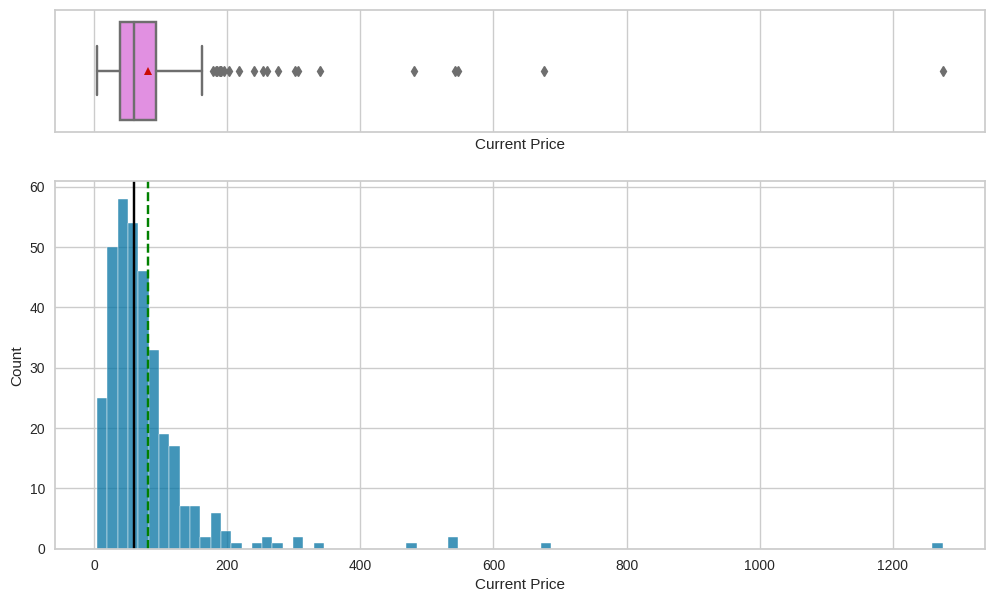

In [ ]:
histogram_boxplot(stocks, 'Current Price')

#### Observations

 - The distribution is skewed to the right
 - There also outliers on the higher end

#### Understanding the distribution of **`price change`**

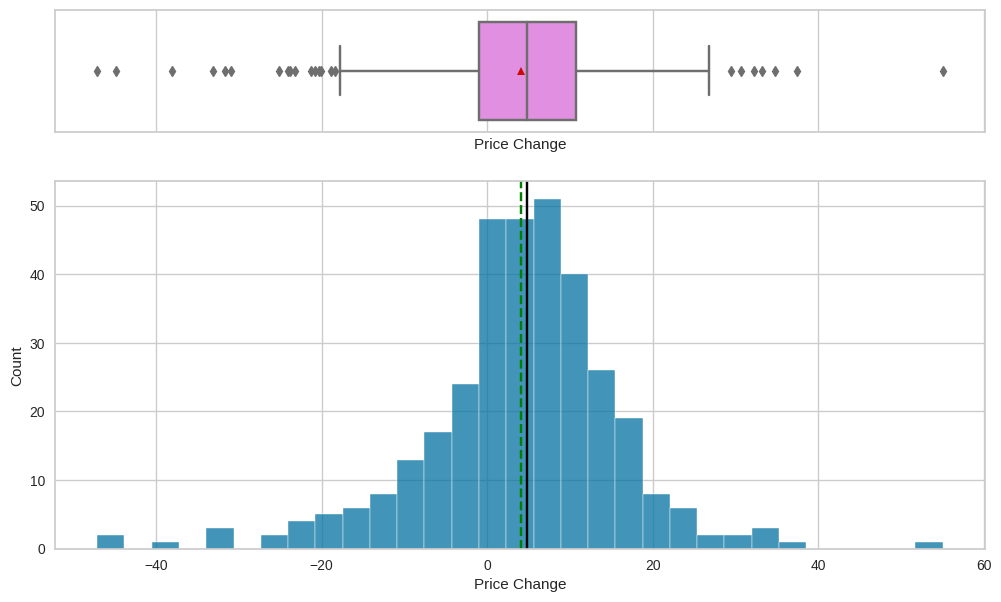

In [ ]:
histogram_boxplot(stocks, 'Price Change')

#### Observations
 - Price change distribution is almost normal
 - Mean and Mode values are very close
 - The data have outliers at both ends

#### Understanding the distribution of **`Volatility`**

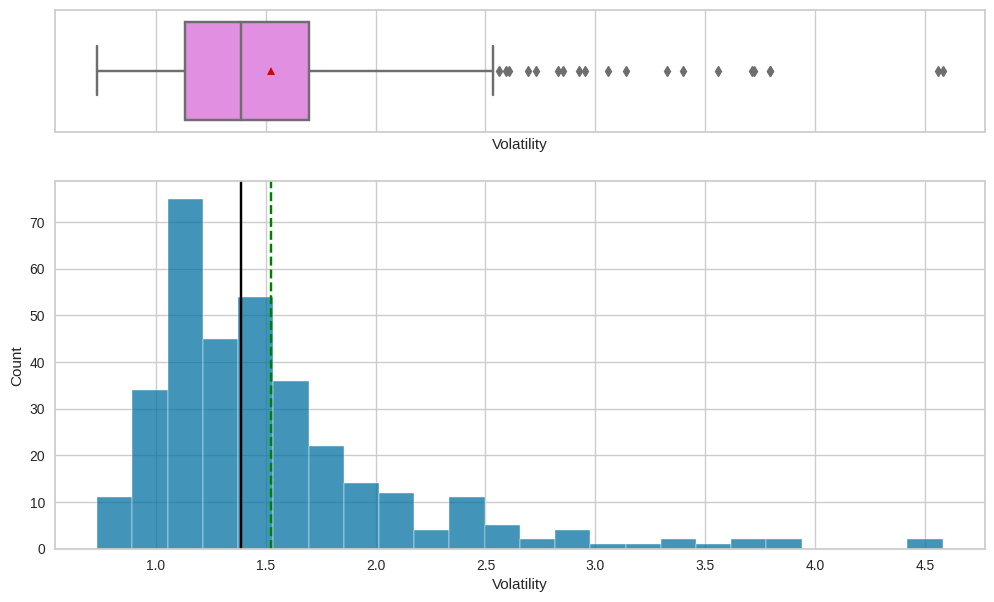

In [ ]:
histogram_boxplot(stocks, 'Volatility')

#### Observations

 - The distribution is skewed to the right
 - There also outliers on the higher end, recording as high as 4.5 standard deviation

#### Understanding the distribution of **`ROE`**

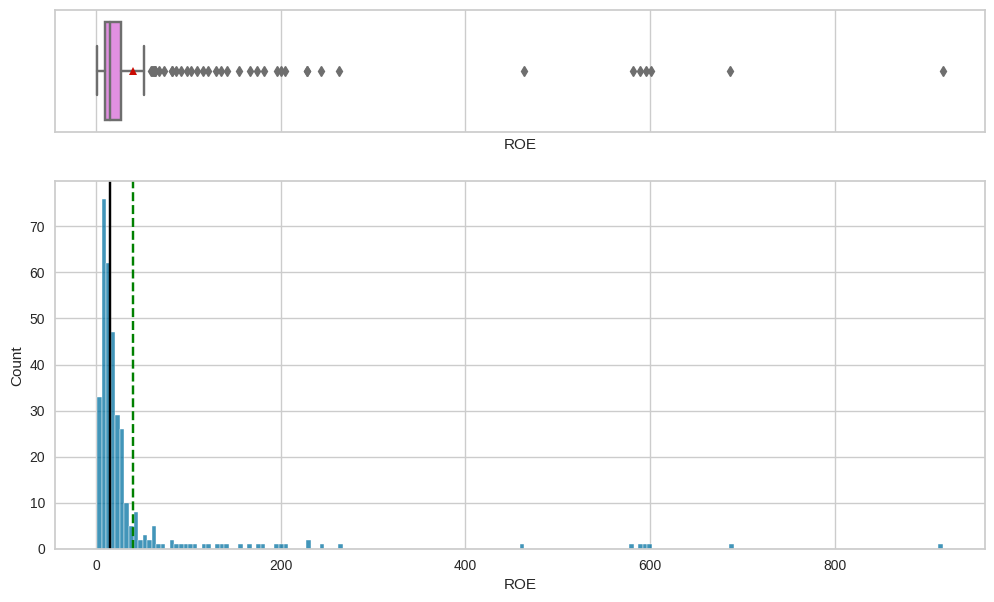

In [ ]:
histogram_boxplot(stocks, 'ROE')

#### Observations

 - The distribution is skewed to the right
 - There also outliers on the higher end

#### Understanding the distribution of **`Cash Ratio`**

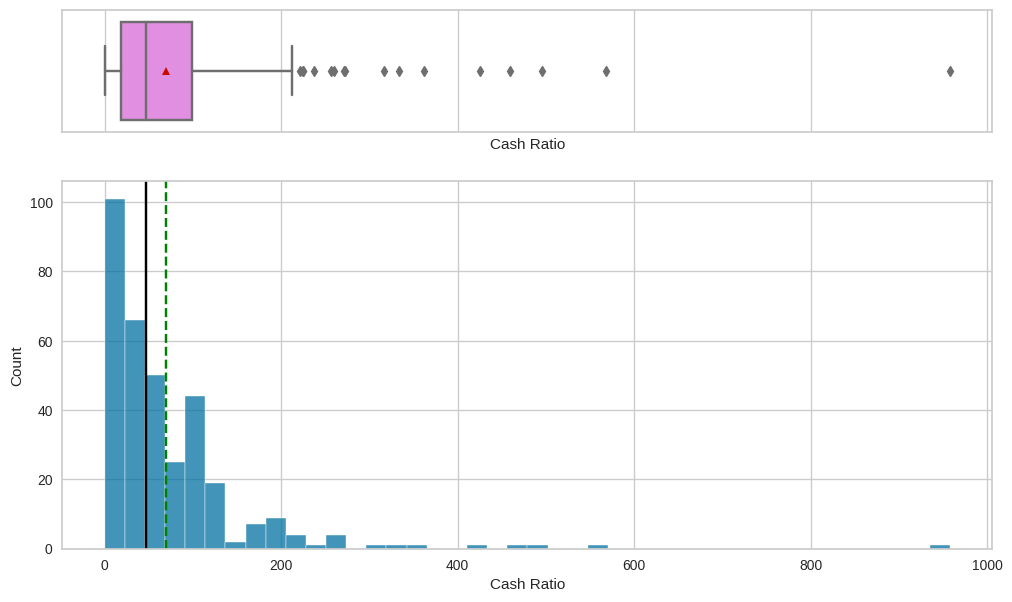

In [ ]:
histogram_boxplot(stocks, 'Cash Ratio')

#### Observations

 - The distribution is skewed to the right
 - There also outliers on the higher end

#### Understanding the distribution of **`Net Cash Flow`**

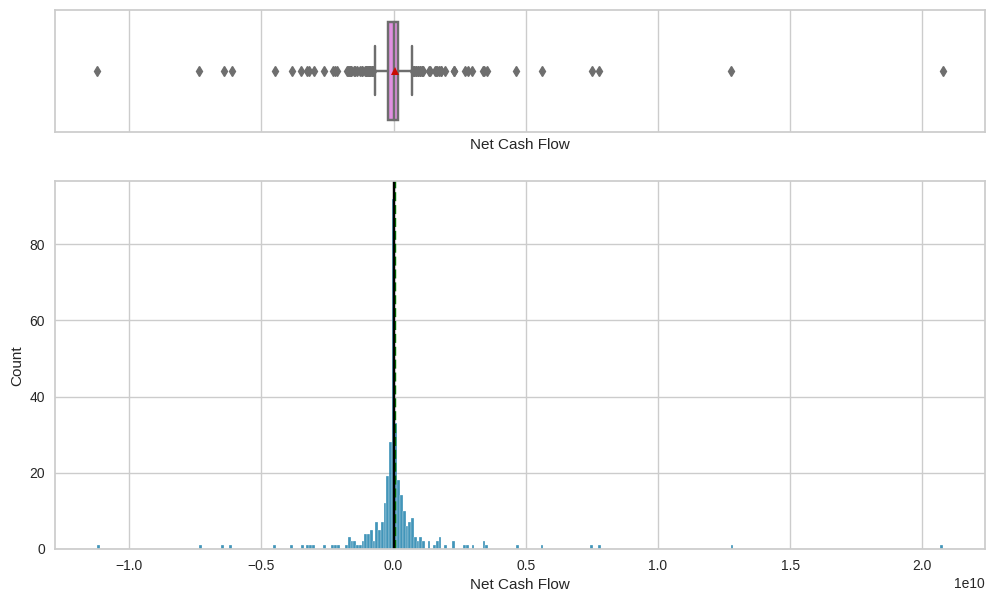

In [ ]:
histogram_boxplot(stocks, 'Net Cash Flow')

#### Observations
 - Net Cash Flow distribution is almost normal
 - Mean and Mode values are almost the same
 - The data have outliers at both ends

#### Understanding the distribution of **`Net Income`**

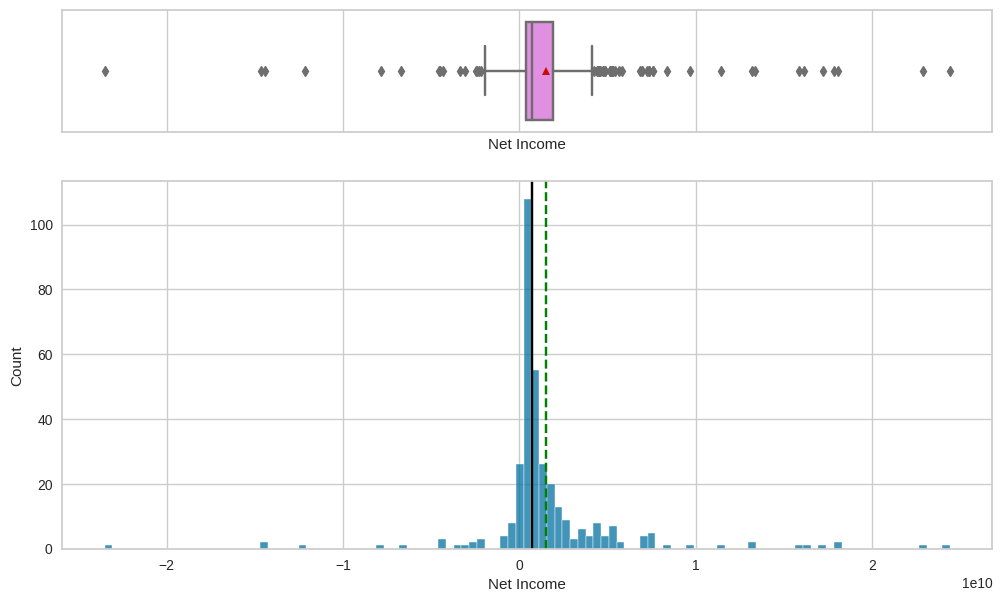

In [ ]:
histogram_boxplot(stocks, 'Net Income')

#### Observations
  - The data have outliers at both ends

#### Understanding the distribution of **`Earnings Per Share`**

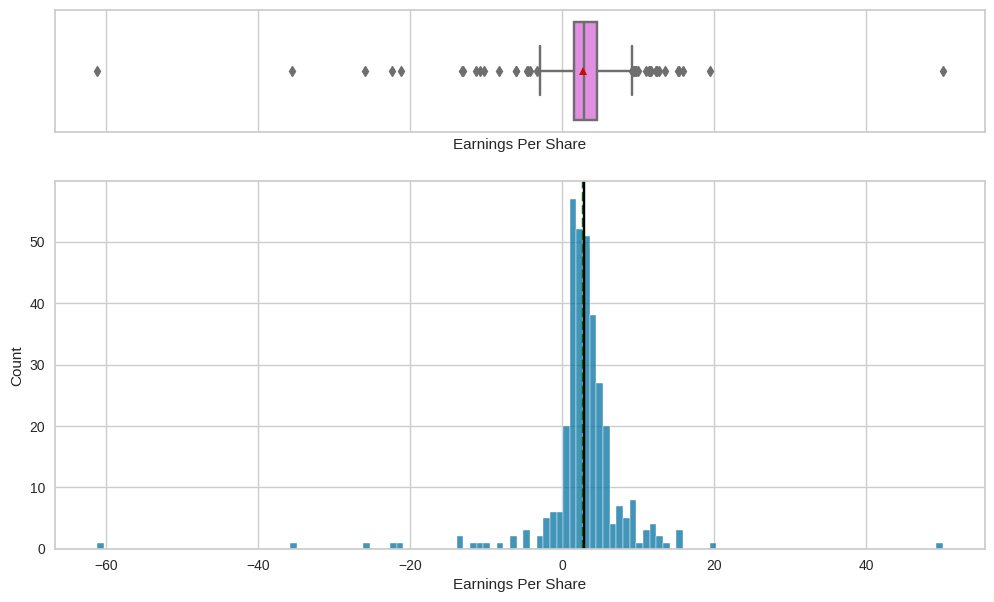

In [ ]:
histogram_boxplot(stocks, 'Earnings Per Share')

#### Observations
  - Mean and Mode values are almost the same
  - The data have outliers at both ends

#### Understanding the distribution of **`Estimated Shares Outstanding`**

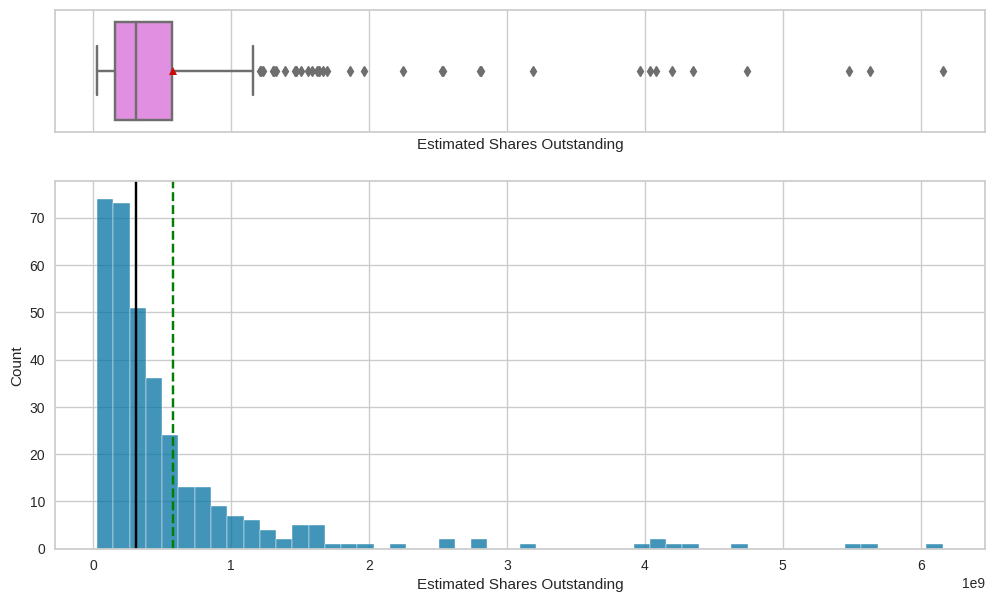

In [ ]:
histogram_boxplot(stocks, 'Estimated Shares Outstanding')

#### Observations

 - The distribution is skewed to the right
 - There also outliers on the higher end

#### Understanding the distribution of **`P/E Ratio`**

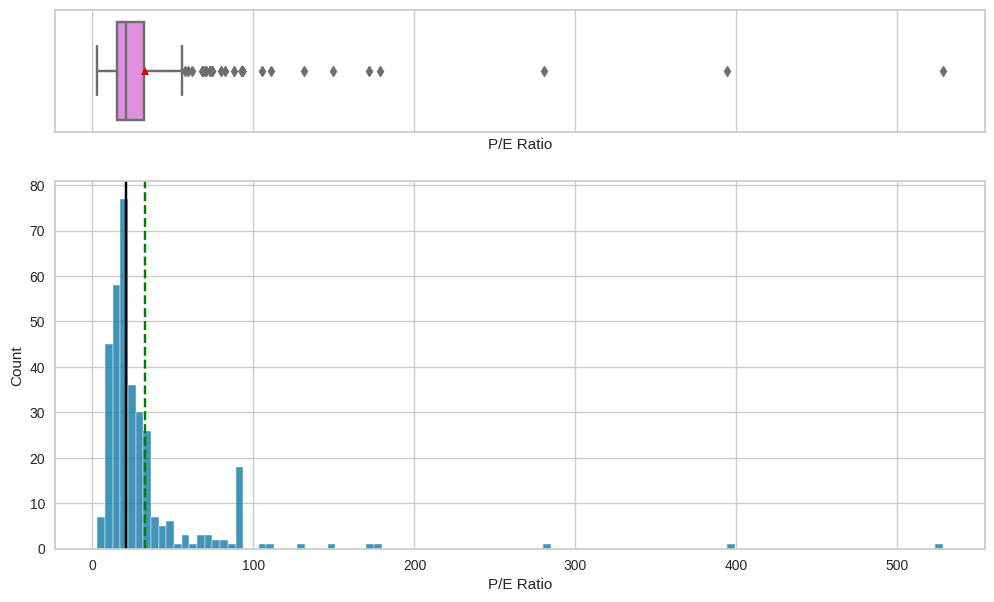

In [ ]:
histogram_boxplot(stocks, 'P/E Ratio')

#### Observations

 - The distribution is skewed to the right
 - There also outliers on the higher end

#### Understanding the distribution of **`P/B Ratio`**:

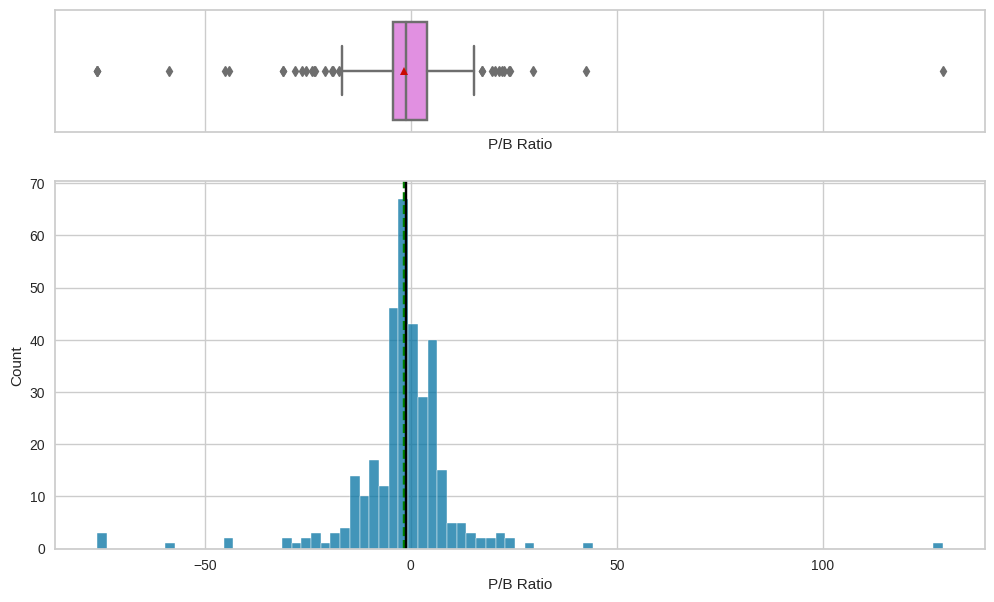

In [ ]:
histogram_boxplot(stocks, 'P/B Ratio')

#### Observations
  - Mean and Mode values are almost the same
  - The data have outliers at both ends

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

 - Both **`Ticker Symbol`** and **`Security`** have unique values for each row, therefore no meaningfull insight can be drawn for their visualisation

#### Understanding the distribution of **`GICS Sector`**

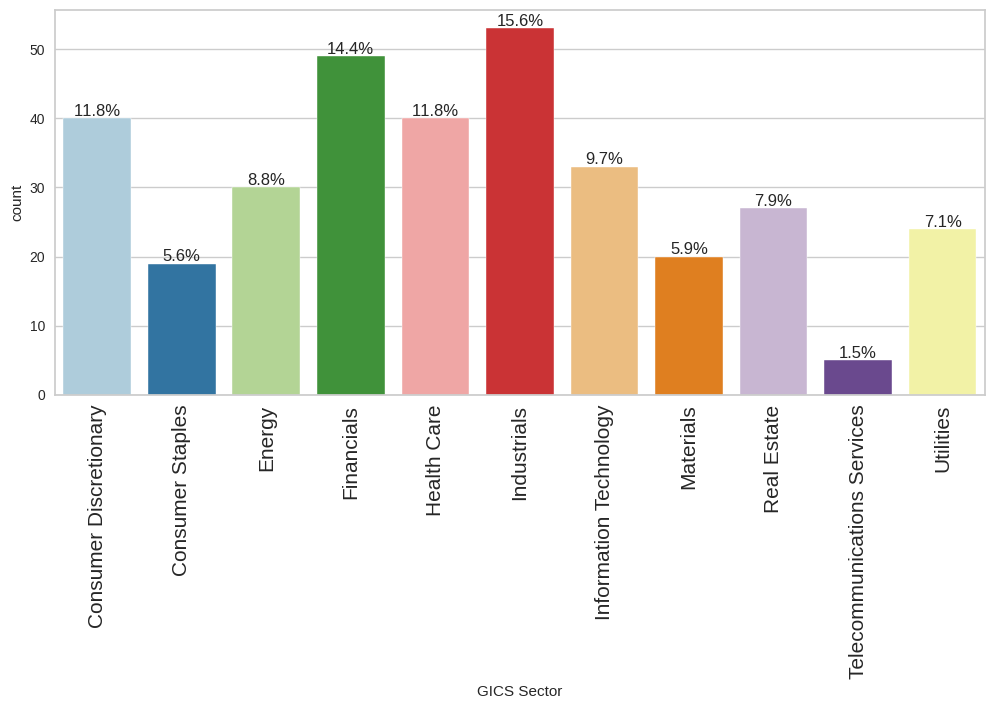

In [ ]:
labeled_barplot(stocks, 'GICS Sector', perc=True)

#### Observations
  - The top 4 sectors are **`Industrials`**, **`Financials`**, **`Consumer Discretionary`** and **`Health Care`**

#### Understanding the distribution of **`GICS Sub Industry`**

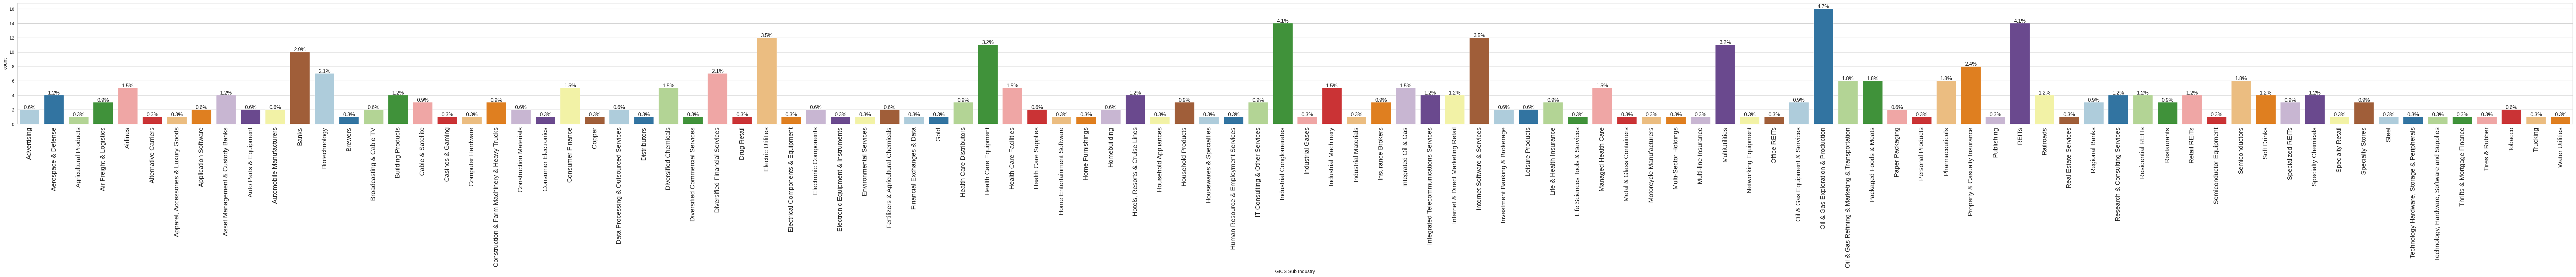

In [ ]:
labeled_barplot(stocks, 'GICS Sub Industry', perc=True)

### Bivariate Analysis

 > Checking how the different variables are correlated with each other



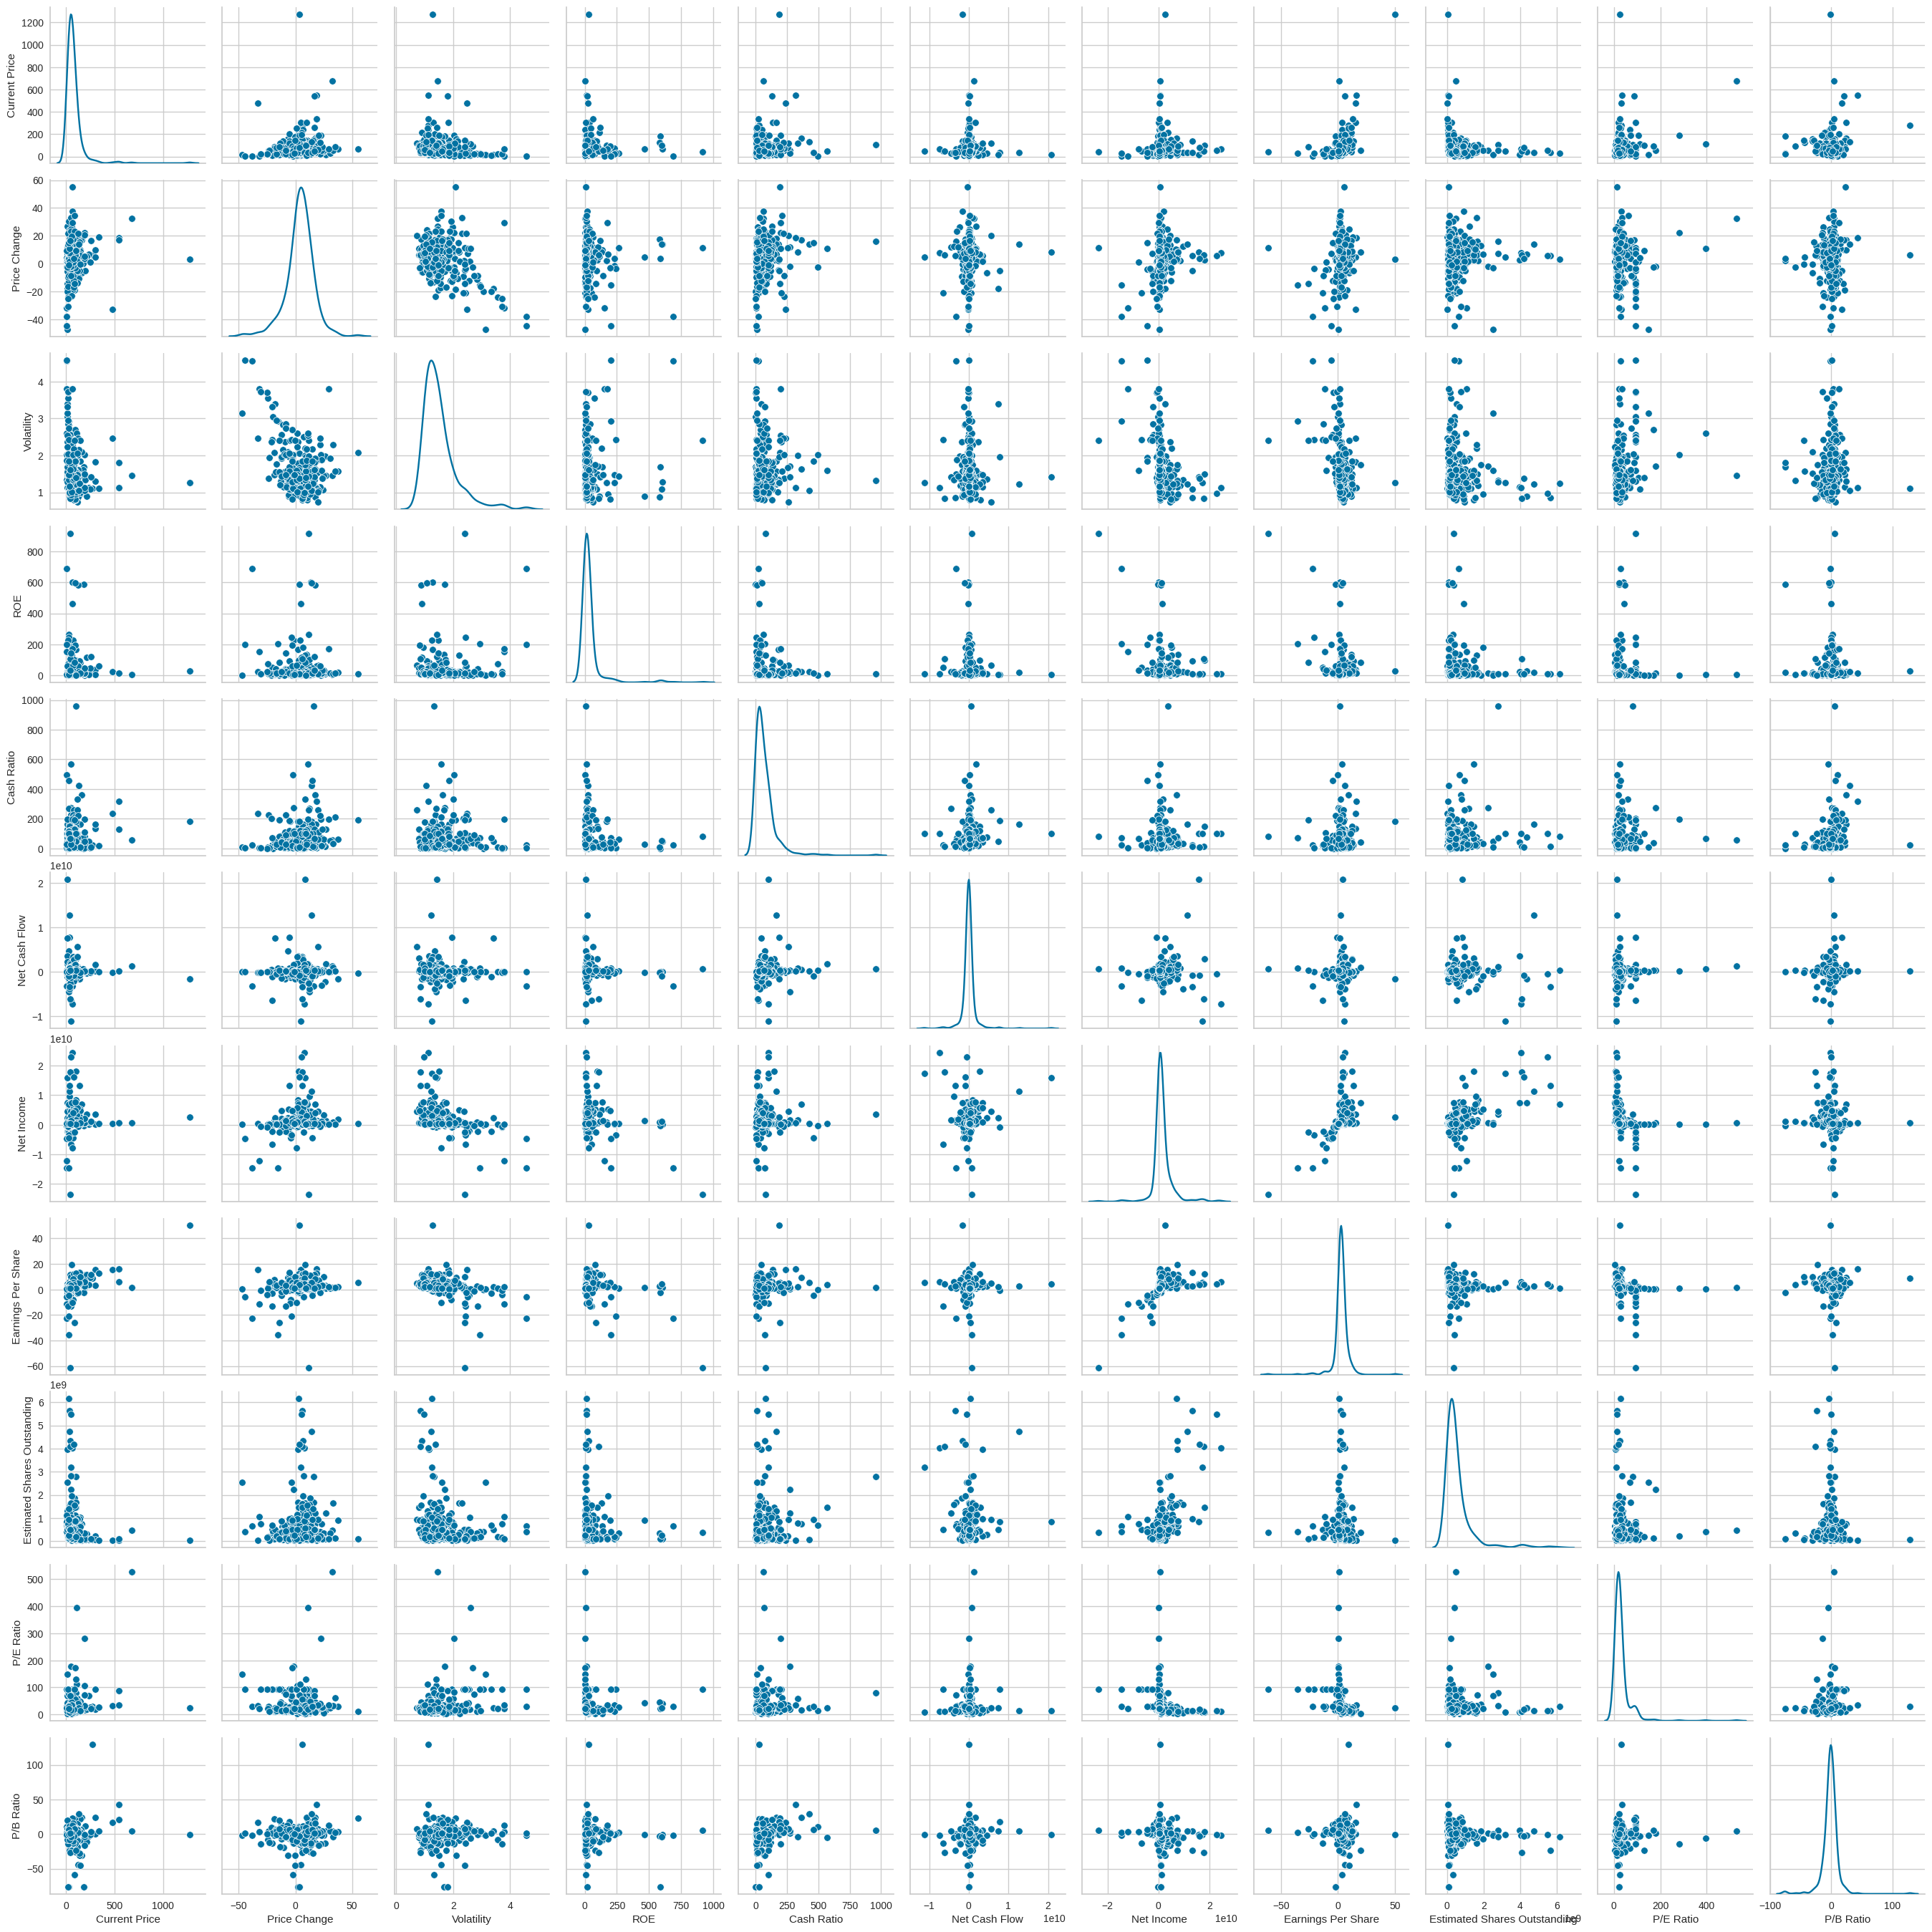

In [ ]:
sns.pairplot(stocks, diag_kind = 'kde', diag_kws=dict(fill=False))
plt.show()

#### Observations
  - By observating the pairplot, there are not clear relationships between the variable, we then does not have correllation issues among the variables

  > Checking stocks of which economic sector have seen the maximum price increase on average



<Figure size 2500x1500 with 0 Axes>

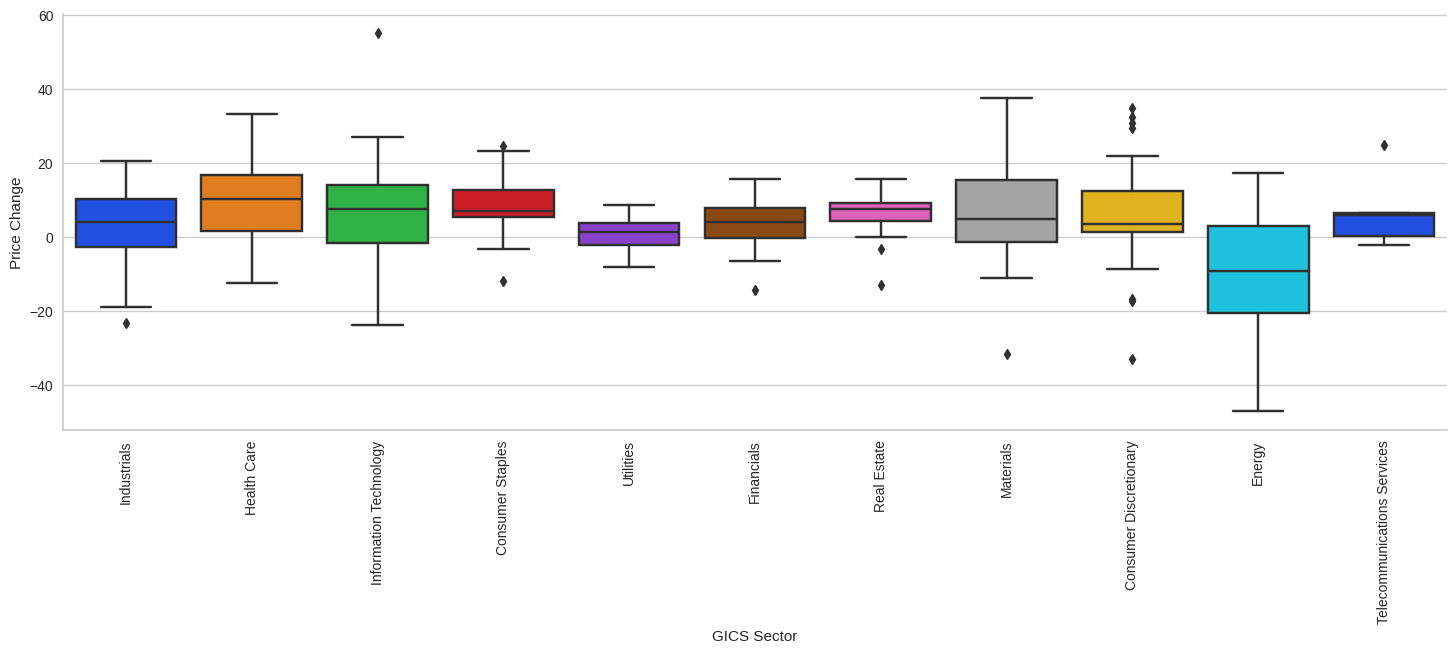

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='Price Change', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - Per the above plot, taking into consideration the mode figure, **`Health Care`** recording mode percentage price increase of approximately 10%
  - **`Energy`** recorded the most percentage decrease in stock price with approximately -10% decrease



   > Checking how the average cash ratio vary across economic sectors




<Figure size 2500x1500 with 0 Axes>

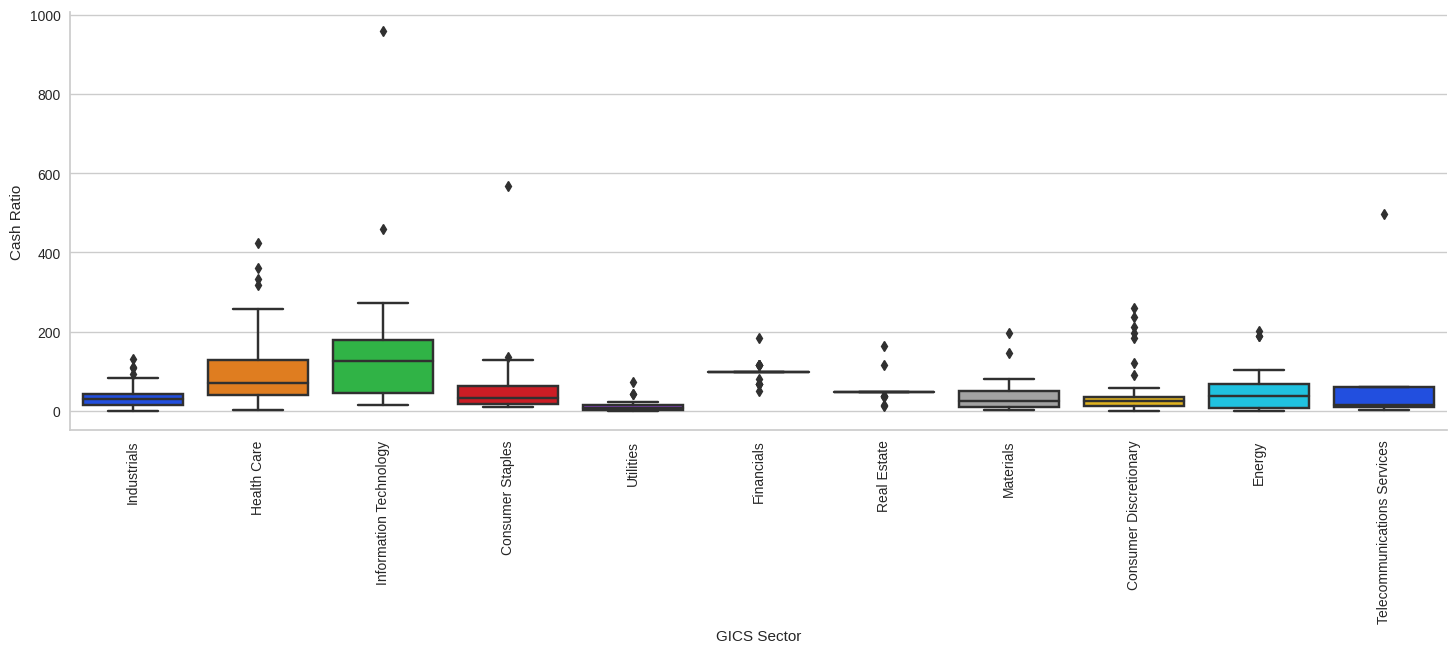

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='Cash Ratio', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot Information Technology sector recorded the highest mode cash ratio on average followed by Financials
  - There are some outliers across the sectors

   > Checking how the P/E ratio vary, on average, across economic sectors



<Figure size 2500x1500 with 0 Axes>

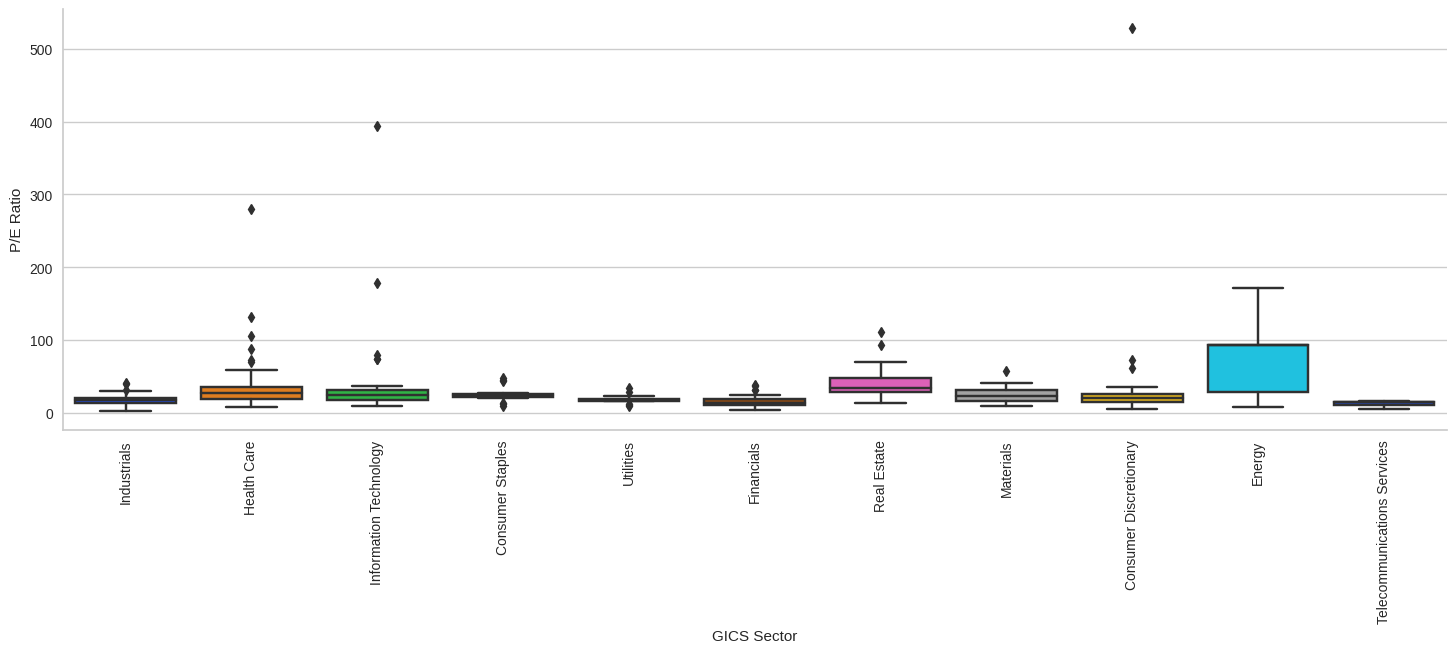

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='P/E Ratio', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot Real Estate sector recorded the highest mode P/E Ratio, however Energy has the widest distribution

   > Checking how the Current Price vary across economic sectors

<Figure size 2500x1500 with 0 Axes>

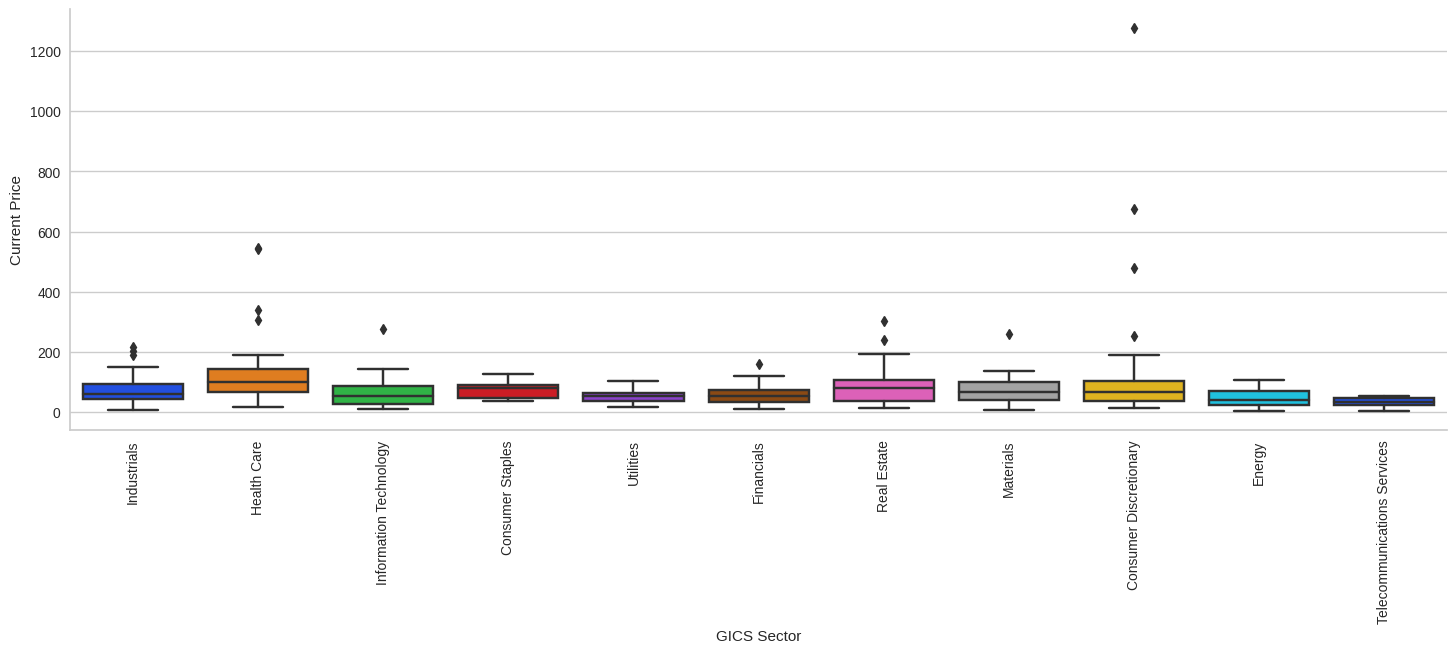

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='Current Price', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot Health Care and Real Estate sector have the highest mode current price
  - Consumer Discretionary have an outlier as high as approximately 1,400

> Checking how the Volatility vary across economic sectors

<Figure size 2500x1500 with 0 Axes>

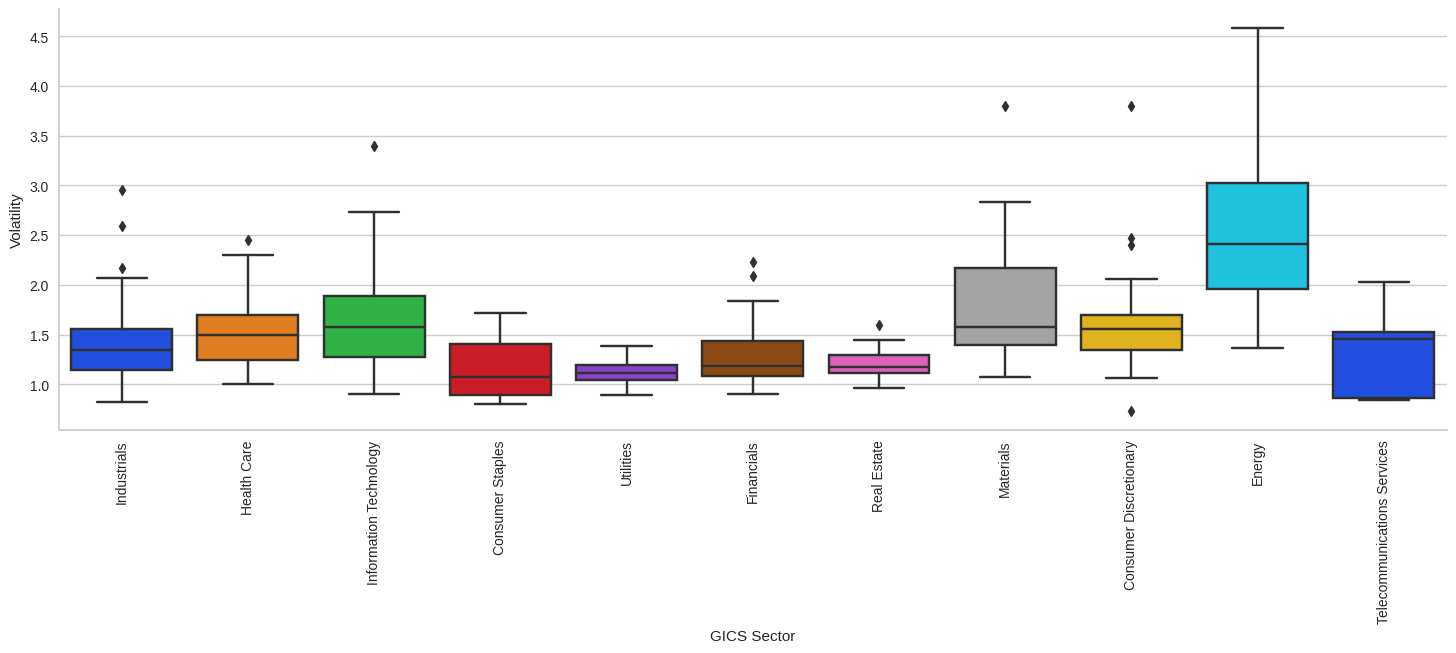

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='Volatility', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot Energy sector have the highest volatitlity


   > Checking how the ROE vary across economic sectors



<Figure size 2500x1500 with 0 Axes>

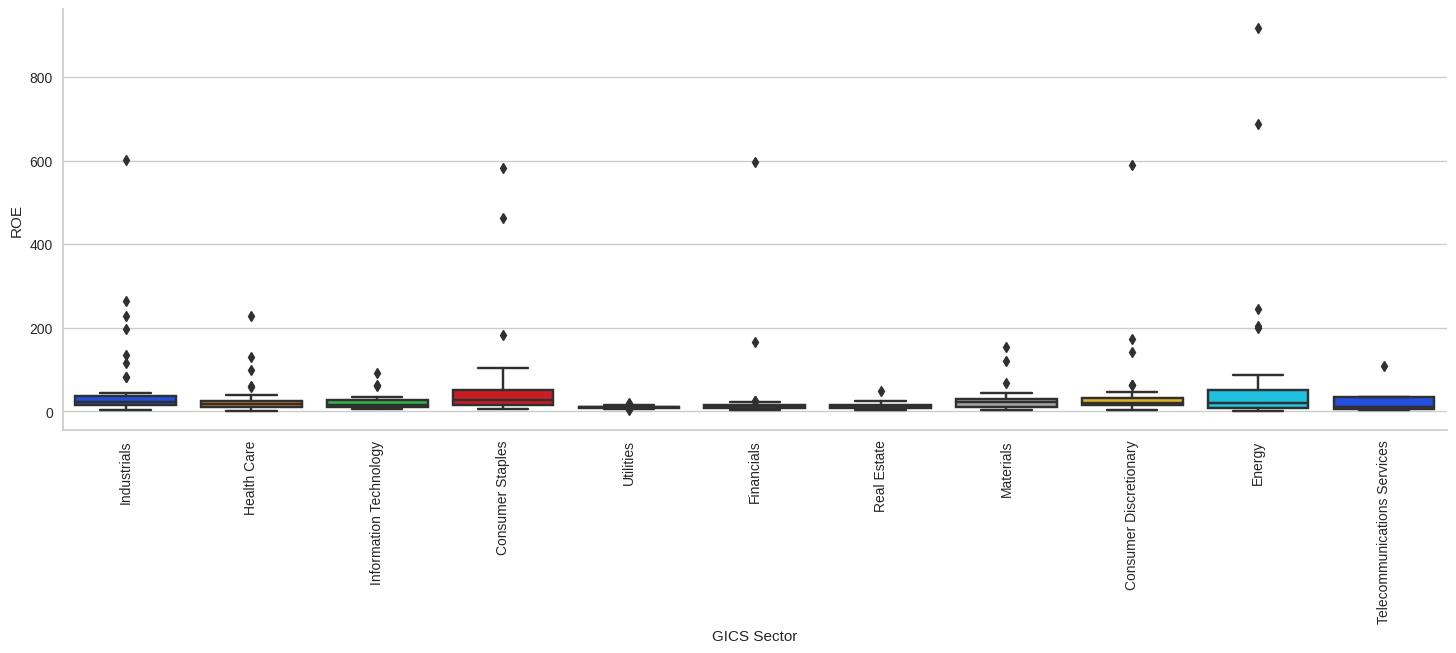

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='ROE', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot Energy sector have the highest volatitlity


> Checking how the Net Cash Flow vary across economic sectors



<Figure size 2500x1500 with 0 Axes>

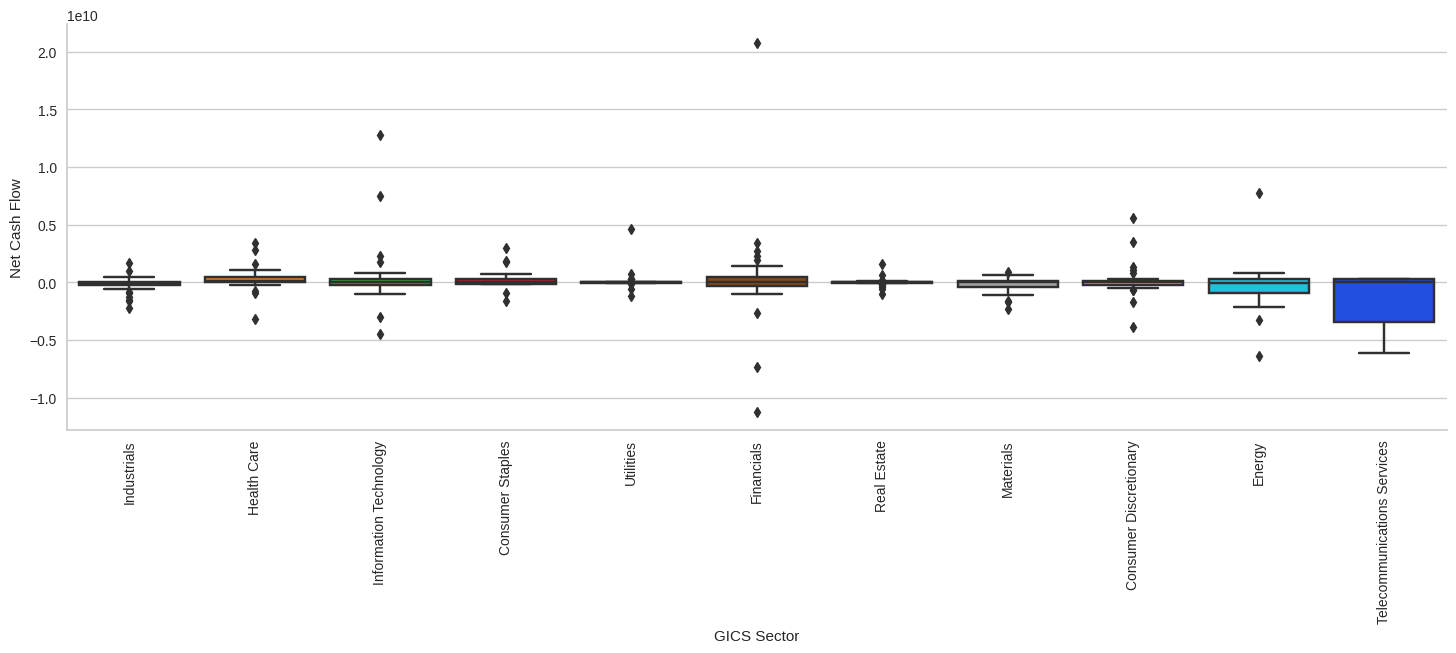

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='Net Cash Flow', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot all sectors seems to have same modal value for Net Cash Flow

> Checking how the Net Income vary across economic sectors

<Figure size 2500x1500 with 0 Axes>

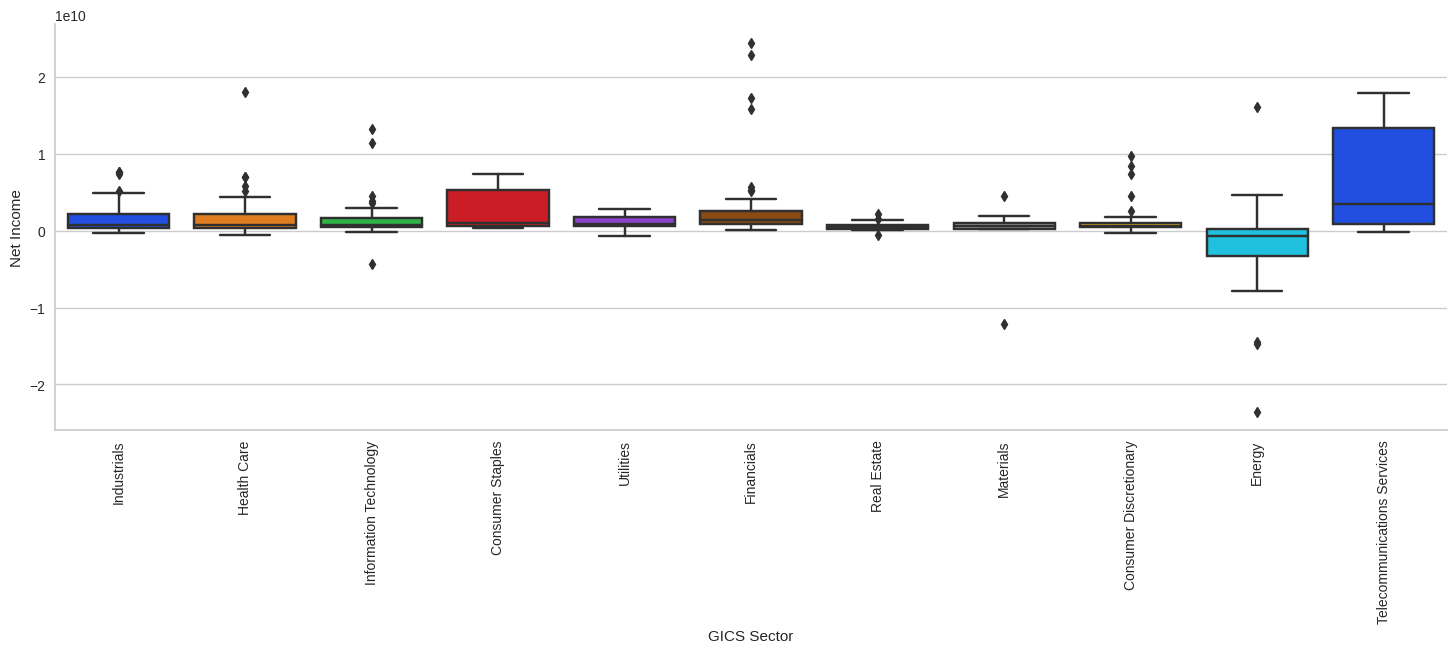

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='Net Income', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot Telecommunications services sector has the best Net Income per mode, all remaining sectors have approximately same modal values

> Checking how the Earnings Per Share vary across economic sectors

<Figure size 2500x1500 with 0 Axes>

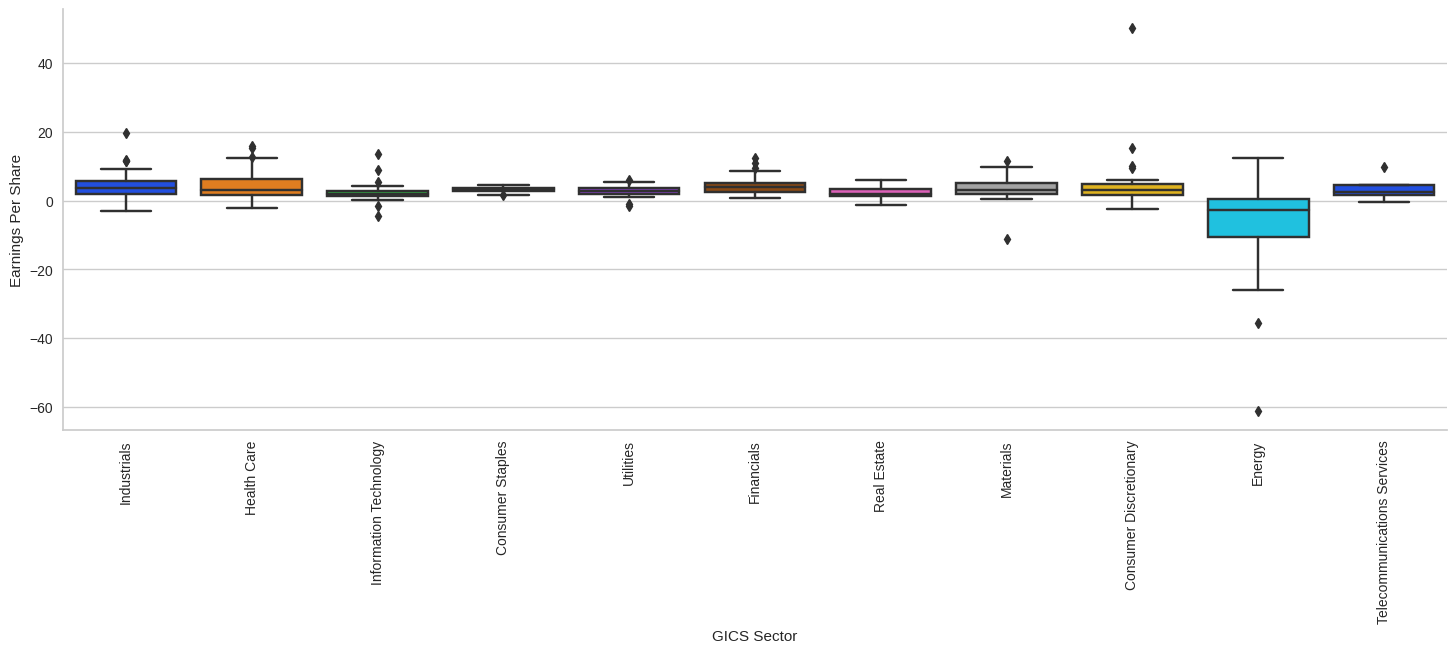

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='Earnings Per Share', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot apart from the Energy Sector which have negative mode of Earnings per share, the remaining have positive earnings per share

> Checking how the Estimated Shares Outstanding vary across economic sectors

<Figure size 2500x1500 with 0 Axes>

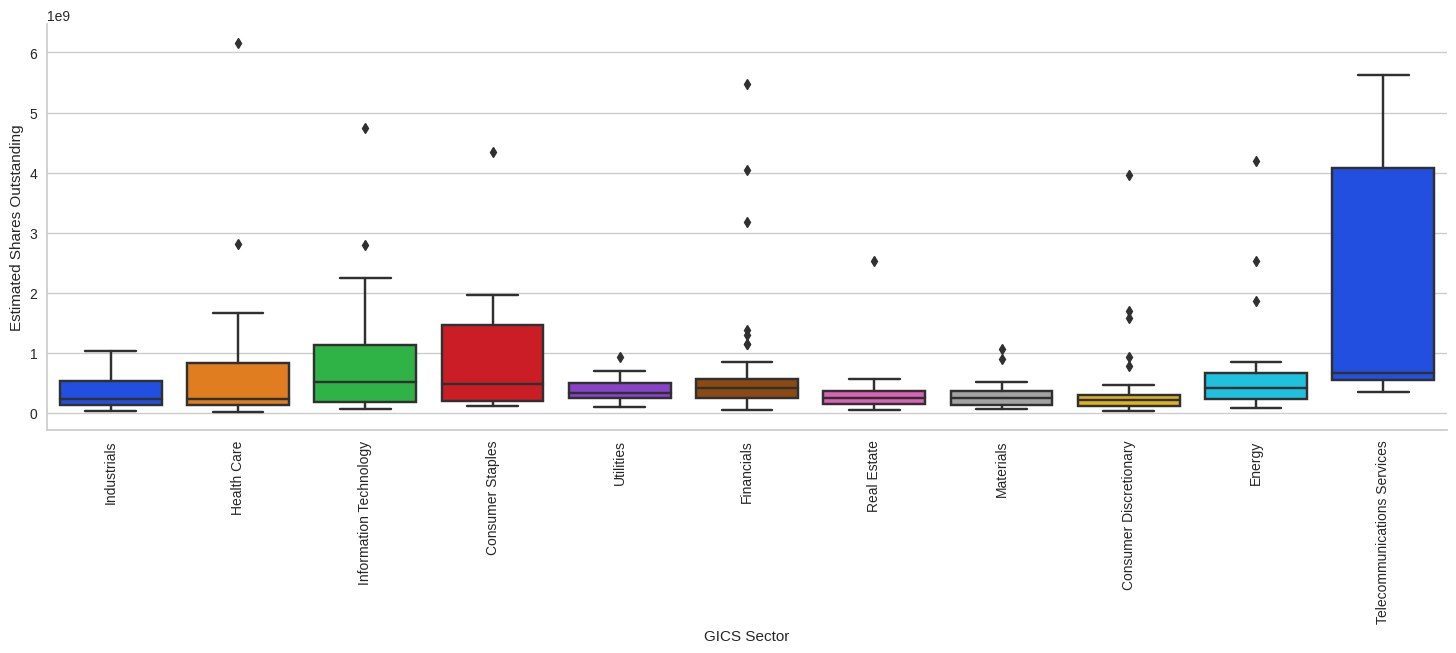

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='Estimated Shares Outstanding', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot there are outliers accross some sectors, Telecommunication turns out to have the highest modal value of Estimated shares outstandings

> Checking how the P/B Ratio vary across economic sectors

<Figure size 2500x1500 with 0 Axes>

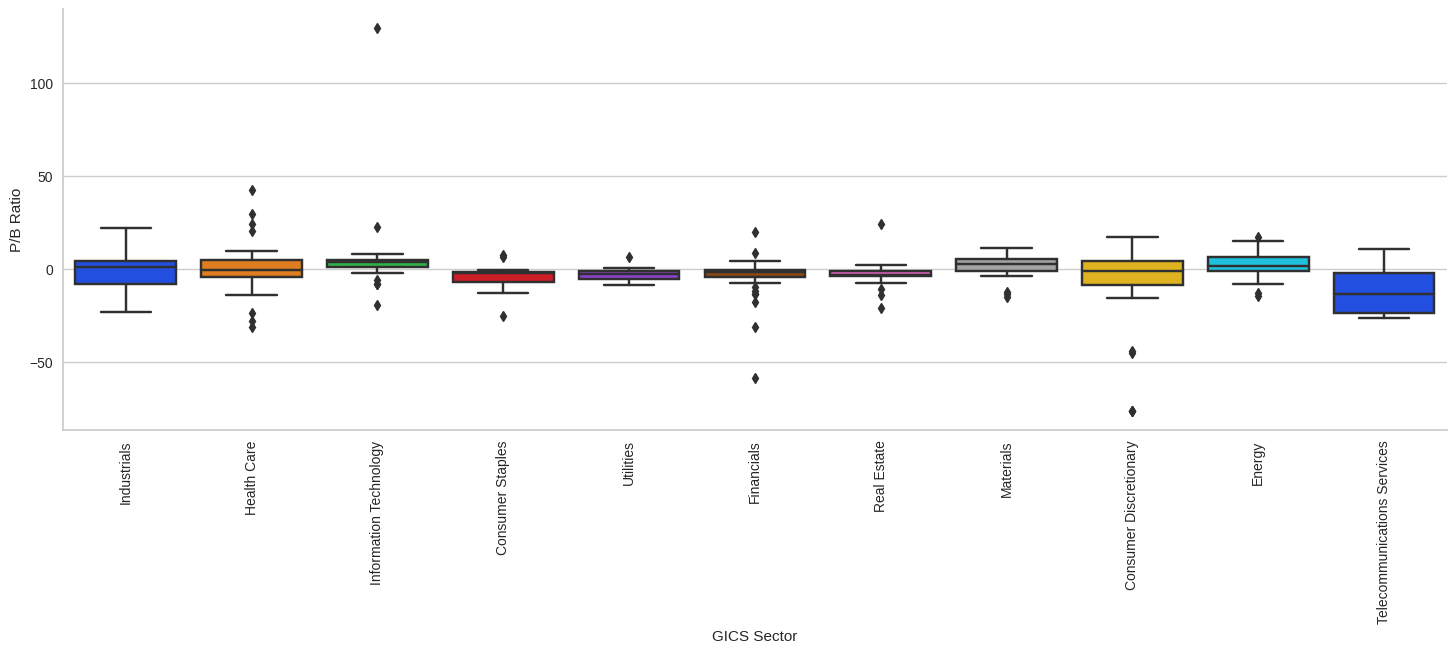

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=stocks, x='GICS Sector', y='P/B Ratio', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Observations
  - From above plot the P/B Ratio modal value for Telecommunication Services sector is negative, the remaining sectors have approximately same values.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)



 - As alredy observed, there no missing values and duplicated rows



#### Checking the counts of unique items in each column

In [ ]:
stocks['Ticker Symbol'].value_counts()

AAL     1
NEE     1
NUE     1
NTRS    1
NSC     1
       ..
EQR     1
EQIX    1
EOG     1
EMN     1
ZTS     1
Name: Ticker Symbol, Length: 340, dtype: int64

In [ ]:
stocks['Security'].value_counts()

American Airlines Group    1
NextEra Energy             1
Nucor Corp.                1
Northern Trust Corp.       1
Norfolk Southern Corp.     1
                          ..
Equity Residential         1
Equinix                    1
EOG Resources              1
Eastman Chemical           1
Zoetis                     1
Name: Security, Length: 340, dtype: int64

   - Ticker Symbol and Security have 340 unique items each, these columns will be droped.

In [ ]:
stocks['GICS Sector'].value_counts()

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

In [ ]:
stocks['GICS Sub Industry'].value_counts()

Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Diversified Chemicals                               5
Consumer Finance                                    5
Integrated Oil & Gas                                5
Industrial Machinery        

In [ ]:
stocks['Current Price'].value_counts()

54.360001     2
114.379997    2
43.230000     2
32.930000     2
103.889999    1
             ..
51.070000     1
52.130001     1
81.589996     1
302.399994    1
47.919998     1
Name: Current Price, Length: 336, dtype: int64

In [ ]:
stocks['Price Change'].value_counts()

 9.999995     1
 6.237855     1
 6.585554     1
 5.796884     1
 9.529966     1
             ..
 8.037605     1
 10.019650    1
-4.078593     1
 3.654238     1
 16.678836    1
Name: Price Change, Length: 340, dtype: int64

In [ ]:
stocks['Volatility'].value_counts()

1.687151    1
1.023375    1
1.460619    1
1.281566    1
2.168814    1
           ..
1.056186    1
1.308082    1
1.941104    1
1.404508    1
1.610285    1
Name: Volatility, Length: 340, dtype: int64

In [ ]:
stocks['ROE'].value_counts()

10     24
9      16
14     16
11     16
17     15
8      14
7      13
13     12
19     10
16      9
6       9
24      9
4       9
12      9
15      9
5       9
26      7
20      7
2       7
22      6
25      6
29      6
18      6
23      5
3       5
30      5
35      5
27      4
28      4
64      3
21      3
1       3
228     2
32      2
36      2
45      2
34      2
43      2
42      2
52      2
82      2
174     1
200     1
61      1
244     1
73      1
86      1
60      1
47      1
103     1
121     1
109     1
40      1
59      1
48      1
37      1
196     1
596     1
182     1
135     1
167     1
263     1
601     1
917     1
38      1
687     1
44      1
589     1
463     1
205     1
130     1
155     1
98      1
41      1
51      1
92      1
33      1
582     1
116     1
68      1
63      1
142     1
Name: ROE, dtype: int64

In [ ]:
stocks['Cash Ratio'].value_counts()

99     37
47     19
25     10
70      8
10      7
27      7
2       7
9       7
3       7
22      6
18      6
11      6
8       5
117     5
6       5
31      5
14      5
67      5
12      4
74      4
39      4
13      4
1       4
43      4
4       4
0       4
16      3
20      3
41      3
29      3
38      3
26      3
5       3
81      3
15      3
37      3
7       3
61      3
49      3
130     2
116     2
35      2
19      2
129     2
34      2
21      2
65      2
190     2
23      2
198     2
46      2
33      2
30      2
44      2
42      2
108     2
54      2
51      2
45      2
36      2
225     2
163     2
24      2
79      2
60      2
58      2
131     1
64      1
147     1
195     1
201     1
362     1
110     1
57      1
71      1
62      1
80      1
68      1
184     1
136     1
272     1
180     1
88      1
212     1
115     1
126     1
56      1
127     1
221     1
425     1
83      1
459     1
568     1
260     1
17      1
183     1
257     1
94      1
77      1
271     1


In [ ]:
stocks['Net Cash Flow'].value_counts()

 159000000    2
 39000000     2
 160383000    2
-8000000      2
 23000000     2
             ..
 4073000      1
-14756000     1
 523803000    1
 2196000      1
-43623000     1
Name: Net Cash Flow, Length: 332, dtype: int64

In [ ]:
stocks['Net Income'].value_counts()

1899000000    2
355000000     2
848000000     2
1034000000    2
636056000     2
             ..
268000000     1
232120000     1
878485000     1
85171000      1
339000000     1
Name: Net Income, Length: 335, dtype: int64

In [ ]:
stocks['Earnings Per Share'].value_counts()

3.28    5
3.71    4
3.03    4
1.80    4
1.58    4
       ..
5.87    1
1.86    1
1.77    1
1.31    1
1.20    1
Name: Earnings Per Share, Length: 268, dtype: int64

In [ ]:
stocks['Estimated Shares Outstanding'].value_counts()

1.992378e+08    4
5.139877e+08    3
1.115226e+08    3
1.469542e+09    2
1.633016e+09    2
               ..
3.671392e+08    1
5.777662e+07    1
5.457799e+08    1
1.485114e+08    1
4.985294e+08    1
Name: Estimated Shares Outstanding, Length: 323, dtype: int64

In [ ]:
stocks['P/E Ratio'].value_counts()

93.089287    17
20.819876     6
24.070121     5
28.407929     3
17.313076     3
             ..
18.636363     1
21.175469     1
55.829113     1
7.575269      1
70.470585     1
Name: P/E Ratio, Length: 295, dtype: int64

In [ ]:
stocks['P/B Ratio'].value_counts()

-1.269332     6
-3.089477     5
-3.973395     4
 3.954975     4
-4.327138     4
             ..
-14.151445    1
 5.108756     1
 4.427425     1
 5.884467     1
 1.723068     1
Name: P/B Ratio, Length: 299, dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

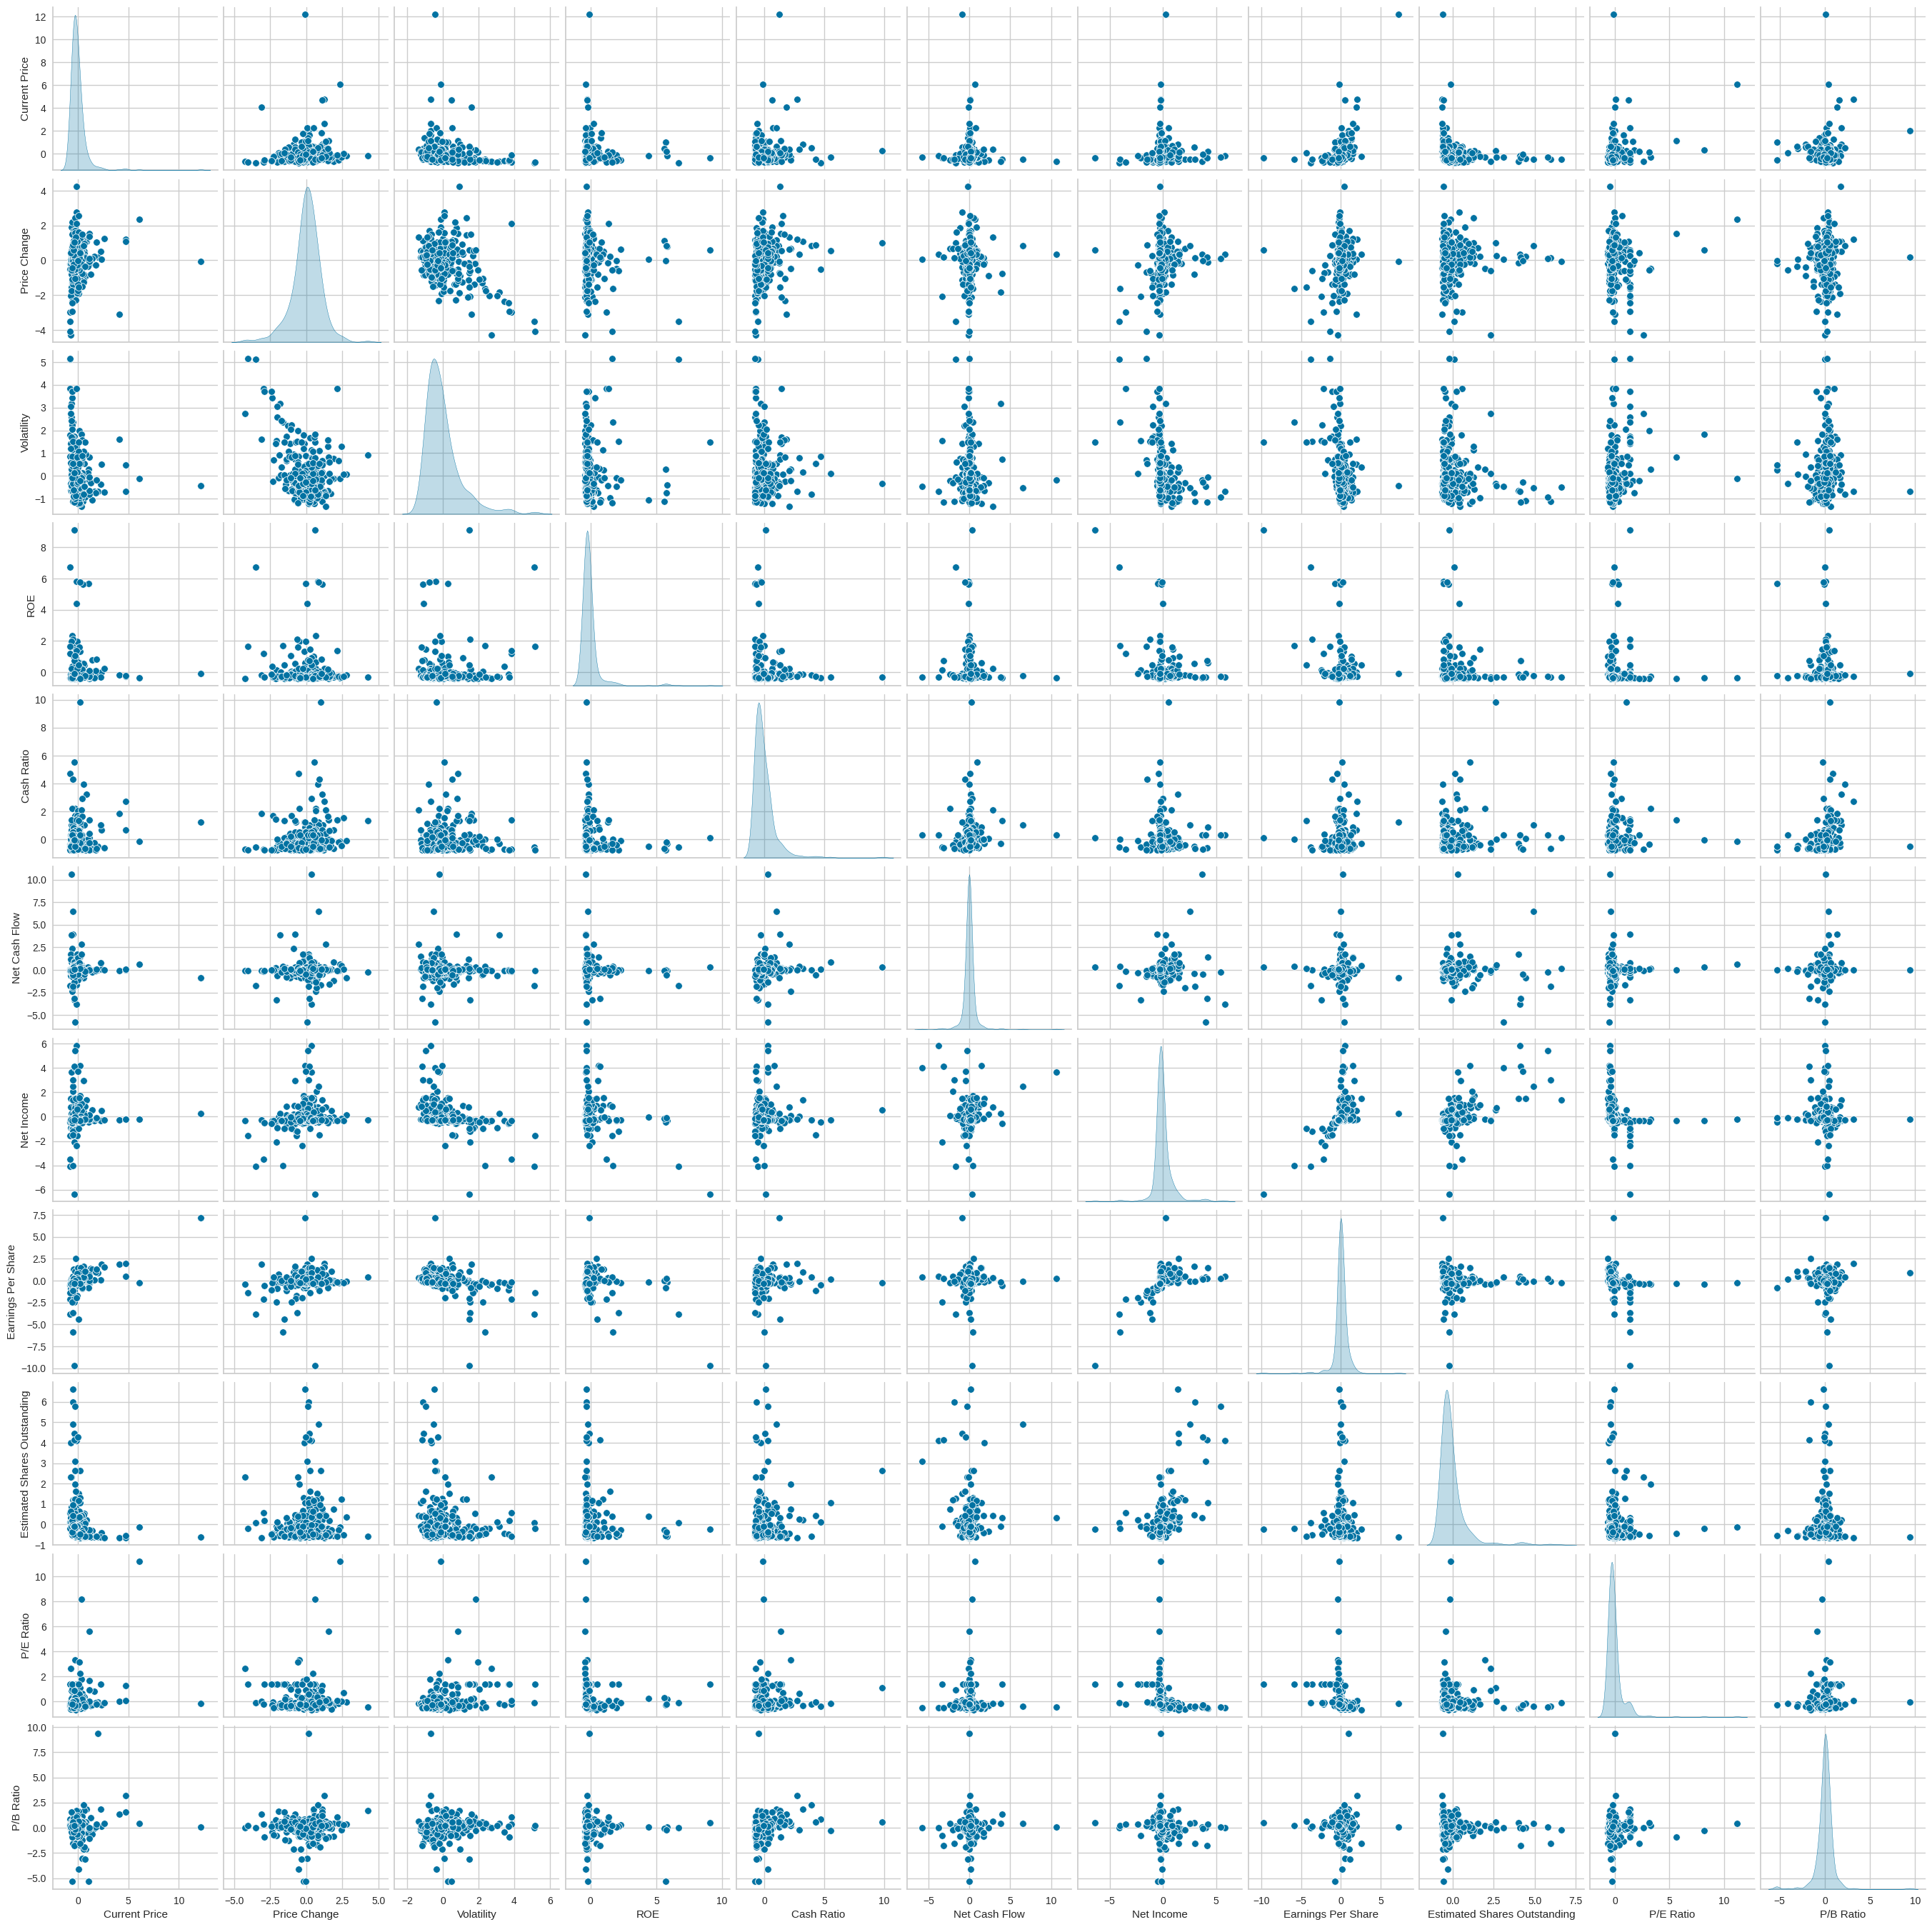

In [ ]:
stocksAttr=stocks.iloc[:,4:]
stocksScaled=stocksAttr.apply(zscore)
sns.pairplot(stocksScaled,diag_kind='kde')

#### Observations
  - By observating the pairplot of the scaled, there are not clear relationships between the variable, we then does not have correllation issues among the variables

## K-means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

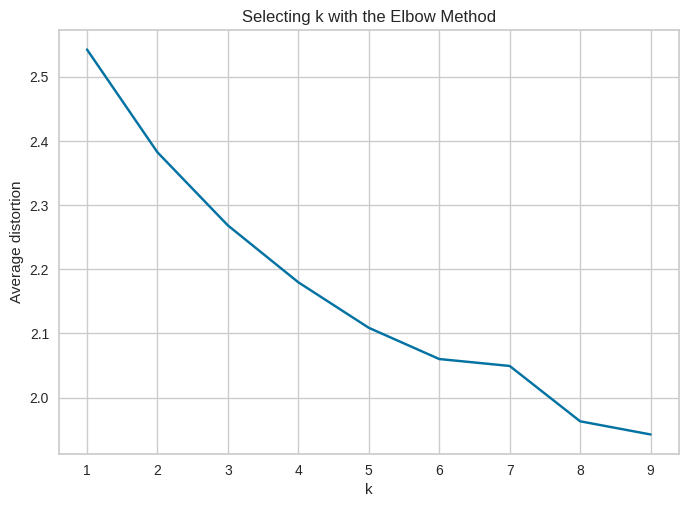

In [ ]:
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(stocksScaled)
    prediction=model.predict(stocksScaled)
    meanDistortions.append(sum(np.min(cdist(stocksScaled, model.cluster_centers_, 'euclidean'), axis=1)) / stocksScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

  - The bend is not very clear, but there are some slight bens at k= 4, 6 and 7

#### checking the silhouette scores

For n_clusters=2, the silhouette score is 0.43969639509980457)
For n_clusters=3, the silhouette score is 0.45494915445064904)
For n_clusters=4, the silhouette score is 0.4710401985531025)
For n_clusters=5, the silhouette score is 0.4225266460322952)
For n_clusters=6, the silhouette score is 0.41011077075729835)
For n_clusters=7, the silhouette score is 0.4009333132771542)
For n_clusters=8, the silhouette score is 0.15138069172662044)
For n_clusters=9, the silhouette score is 0.4081608165082969)


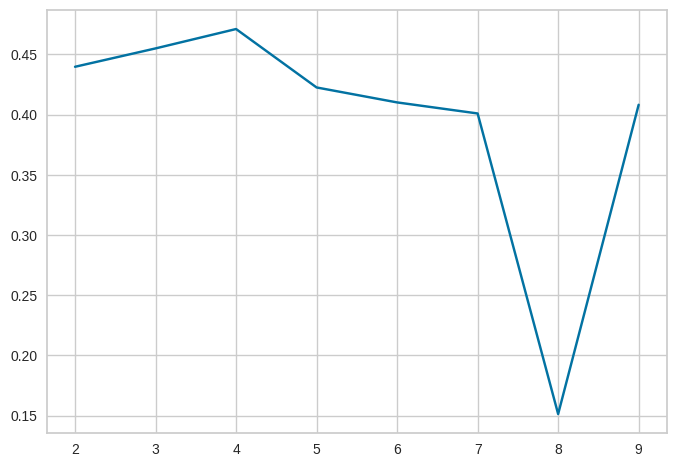

In [ ]:
#checking appropriate cluster with silhouette score
sil_score=[]
cluster_list=list(range(2,10))
for n_clusters in cluster_list:
  clusterer=KMeans(n_clusters=n_clusters)
  preds=clusterer.fit_predict((stocksScaled))
  score=silhouette_score(stocksScaled,preds)
  sil_score.append(score)
  print('For n_clusters={}, the silhouette score is {})'.format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

  - n_clusters= 4 is having the silhouette score much closer to 1, therefore the most appropriate value for k is 4

In [ ]:
# with K = 4
final_model=KMeans(4)
final_model.fit(stocksScaled)
prediction=final_model.predict(stocksScaled)

#Append the prediction
stocks['GROUP'] = prediction
stocksScaled['GROUP'] = prediction
print('Groups Assigned : \n')
stocks.head()

Groups Assigned : 



Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  GROUP  
0                  6.681299e+08    3.718174  -8.784219      0  
1                  1.633016e+09   18.806350  -8.750068      0  
2                  1.504422e+09   15.275510  -0.394171      0  
3                  4.996437e+08   74.555557   4.199651      0  
4                  2.247994e+09  178.451613   1.059810      2

In [ ]:
stocksClust = stocks.groupby(['GROUP'])
stocksClust.mean()

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
GROUP                                                                    
0          72.199223      5.078363    1.388428   34.517986   53.165468   
1          38.099260    -15.370329    2.910500  107.074074   50.037037   
2         243.226804     13.607350    1.742959   26.416667  285.083333   
3          50.517273      5.747586    1.130399   31.090909   75.909091   

       Net Cash Flow    Net Income  Earnings Per Share  \
GROUP                                                    
0       6.069495e+07  1.534032e+09            3.623040   
1      -1.594285e+08 -3.887458e+09           -9.473704   
2       7.545485e+08  9.761372e+08            6.122917   
3      -1.072273e+09  1.483309e+10            4.154545   

       Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
GROUP                                                      
0                      4.399962e+08  23.804667  -3.350239  
1                      4.803986e+08  90.619220   1.342067  
2                      5.672016e+08  77.542325  15.041637  
3                      4.298827e+09  14.803577  -4.552119

#### Understanding the ditribution of the Groups

array([[<Axes: title={'center': 'Cash Ratio'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Current Price'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Earnings Per Share'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Estimated Shares Outstanding'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Net Cash Flow'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Net Income'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'P/B Ratio'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'P/E Ratio'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Price Change'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'ROE'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Volatility'}, xlabel='[GROUP]'>,
        <Axes: >]], dtype=object)

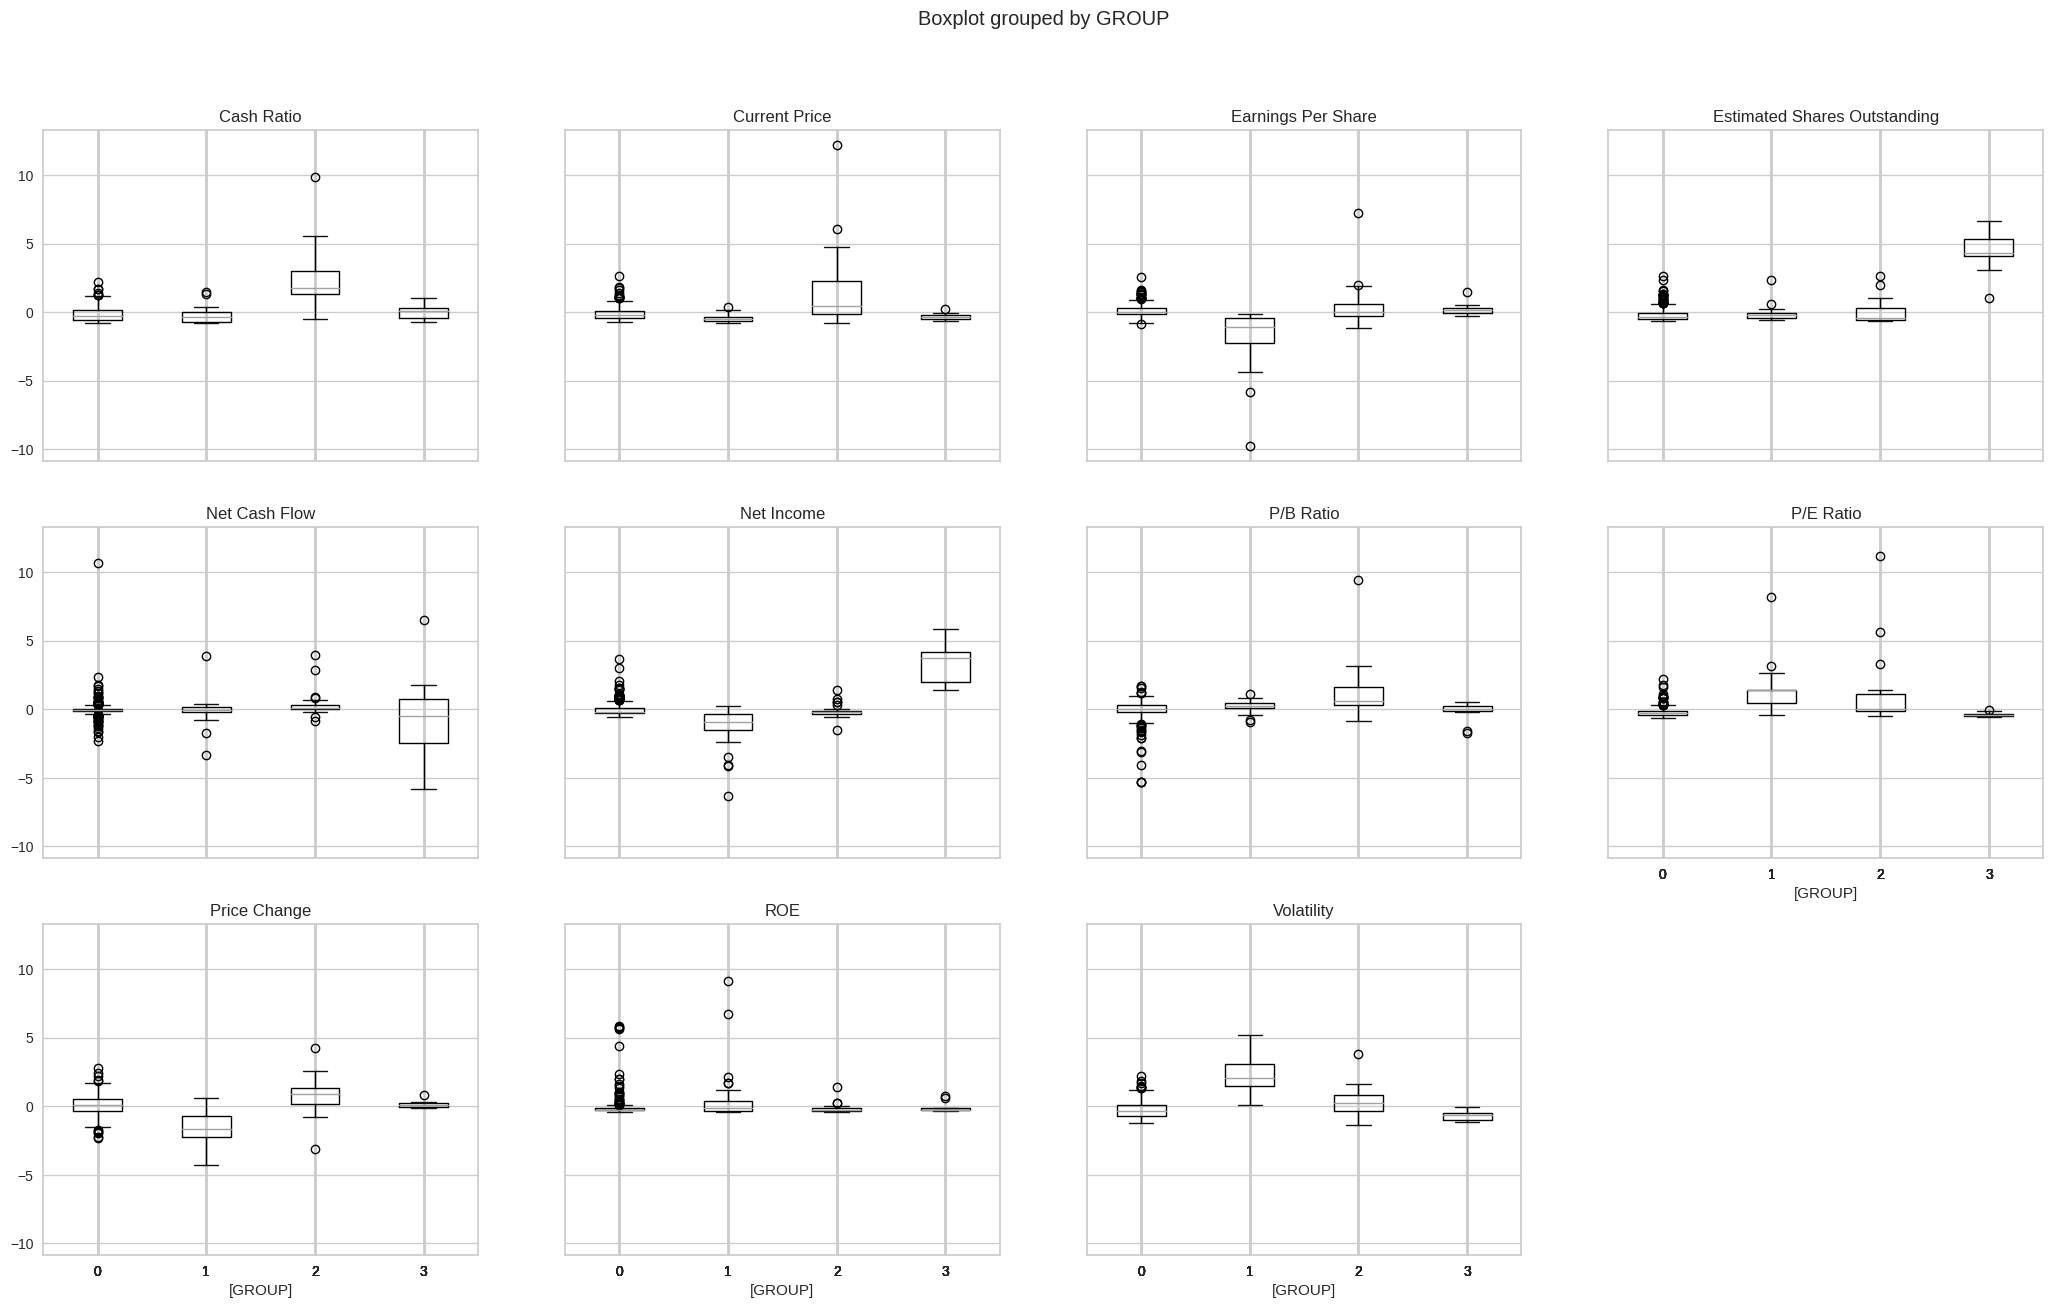

In [ ]:
stocksScaled.boxplot(by='GROUP', layout = (3,4),figsize=(25,15))

#### Observations
  - Group 0 contains lots of outliers accross all variables, it is likely this group is made up of all the extreme values in the variables
  - Group 1 also contains some outliers in some of the variables, the mode price change is negative, while mode volatility is greater than zero
  - Group 2 has the higher P/B Ratio
  - Group 3 has the highest mode Estimated Shares oustanding

In [ ]:
clust_profile = stocks.groupby('GROUP').mean()

In [ ]:
clust_profile['count_in_each_segements'] = (
    stocks.groupby('GROUP')['Price Change'].count().values
)

In [ ]:
# let's display cluster profiles
clust_profile.style.highlight_max(color="lightgreen", axis=0)

 - Group1 is the group with the most counts, 277 in all

## Hierarchical Clustering

In [ ]:
stock=stock_data.copy()

In [ ]:
stockfeat=stock.iloc[:,4:]
stockScaled=stockfeat.apply(zscore)
#sns.pairplot(stockScaled,diag_kind='kde')

In [ ]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [ ]:
model.fit(stockScaled)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [ ]:
stockScaled['labels'] = model.labels_
stockScaled.head(10)

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   
5      -0.451251     -1.342556   -0.016049 -0.307006   -0.232849   
6       1.998837      0.176091   -0.692132 -0.099549   -0.498664   
7      -0.384353     -0.158797   -0.679931 -0.317379   -0.620496   
8      -0.230744     -0.142338   -0.774192 -0.296633   -0.675874   
9      -0.214096     -0.087667   -0.808359 -0.265515    0.320933   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   
5      -0.125823    0.090133            0.032432   
6       0.018187   -0.228206            0.932390   
7       0.119096   -0.218177           -0.026856   
8      -0.021424    0.141806            0.053714   
9      -0.187053    0.263986            0.471769   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  labels  
0                      0.107863  -0.652487  -0.506653       0  
1                      1.250274  -0.311769  -0.504205       0  
2                      1.098021  -0.391502   0.094941       0  
3                     -0.091622   0.947148   0.424333       0  
4                      1.978399   3.293307   0.199196       0  
5                      0.048977  -0.459427   0.660752       0  
6                     -0.603923  -0.035502   9.377562       0  
7                     -0.393572  -0.360984   0.071614       0  
8                     -0.183672  -0.319668  -0.093530       0  
9                     -0.173153  -0.506408  -0.011879       0

In [ ]:
stockClust = stockScaled.groupby(['labels'])
stockClust.mean()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
labels                                                                  
0           -0.033593      0.005859   -0.017377 -0.045771   -0.031773   
1           12.195670     -0.074042   -0.435986 -0.109922    1.262362   
2           -0.575803     -1.453888    3.311126  7.908297   -0.210698   
3            0.243055      1.013134   -0.347539 -0.327752    9.834905   

        Net Cash Flow  Net Income  Earnings Per Share  \
labels                                                  
0            0.005952    0.028723            0.019607   
1           -0.888563    0.268653            7.192572   
2           -0.693613   -5.236157           -6.778822   
3            0.276029    0.552725           -0.222962   

        Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
labels                                                      
0                          -0.005577  -0.006478  -0.003166  
1                          -0.622886  -0.161672   0.047742  
2                          -0.068025   0.635362   0.235430  
3                           2.632871   1.067680   0.545140

In [ ]:
Z = linkage(stockScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(stockScaled))

c

0.9429707355967784

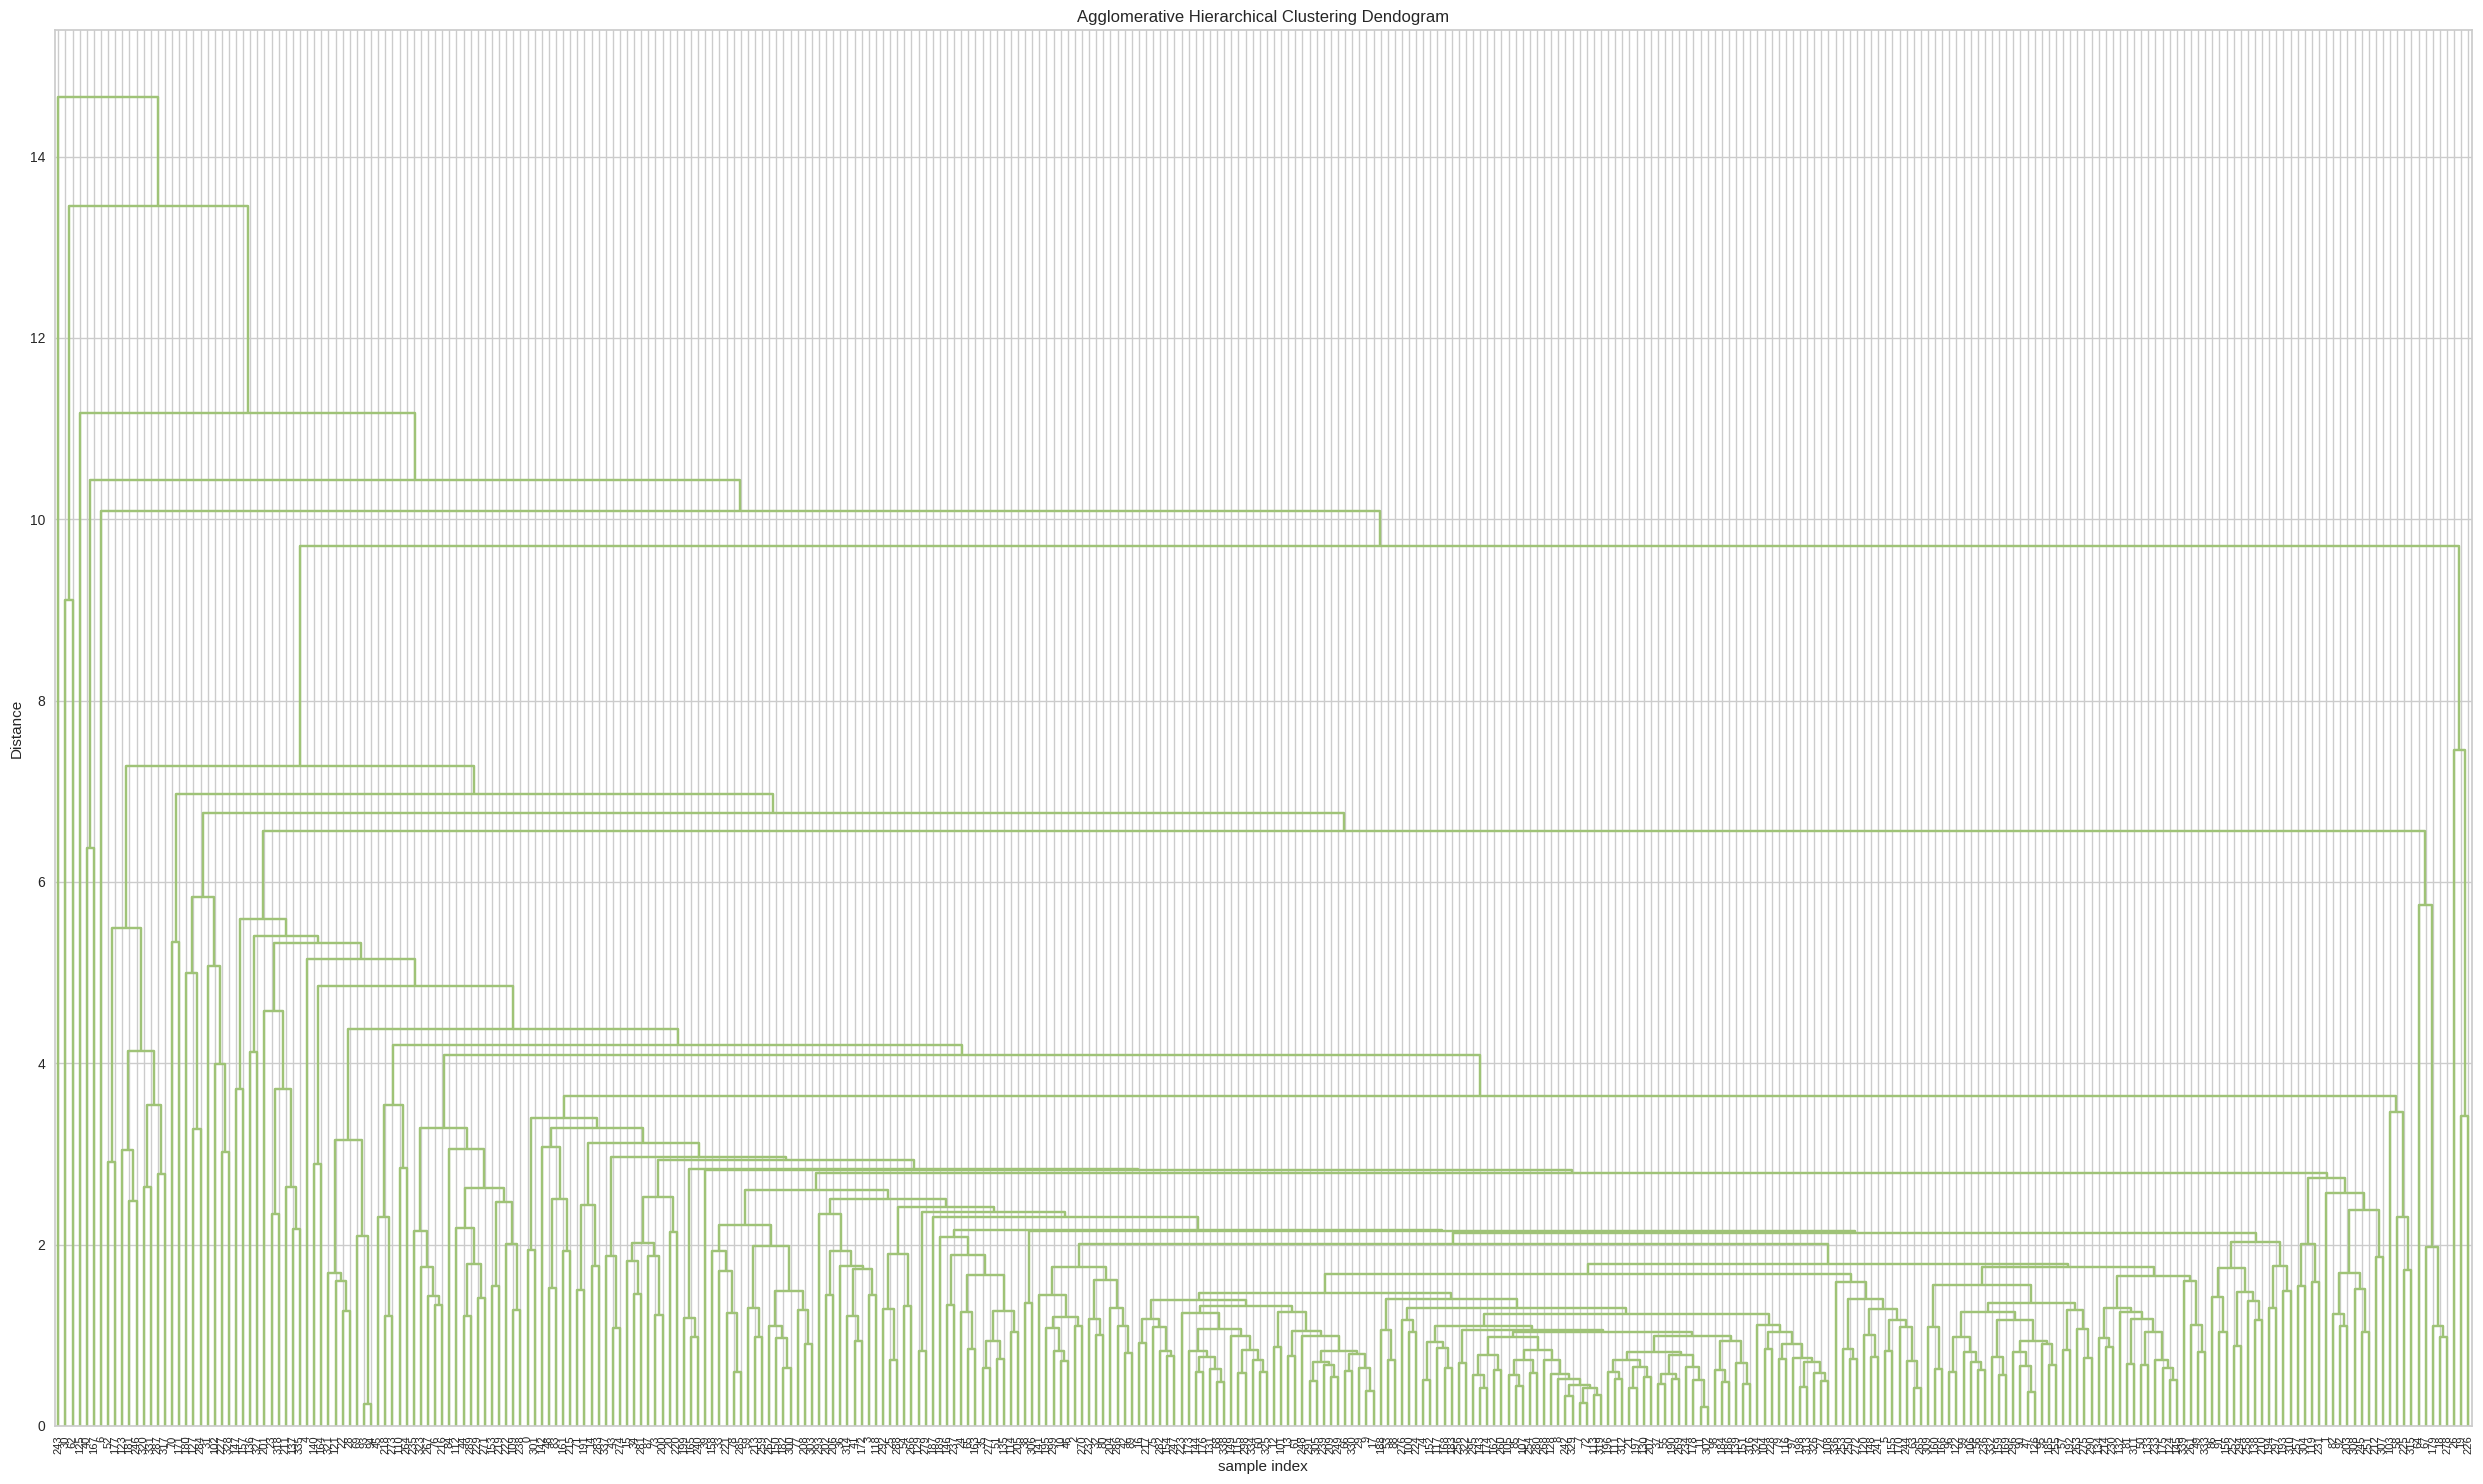

In [ ]:
plt.figure(figsize=(25, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
Z = linkage(stockScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(stockScaled))

c

NameError: ignored

In [ ]:
plt.figure(figsize=(30, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

NameError: ignored

In [ ]:
Z = linkage(stockScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(stockScaled))

c

0.6923622902792922

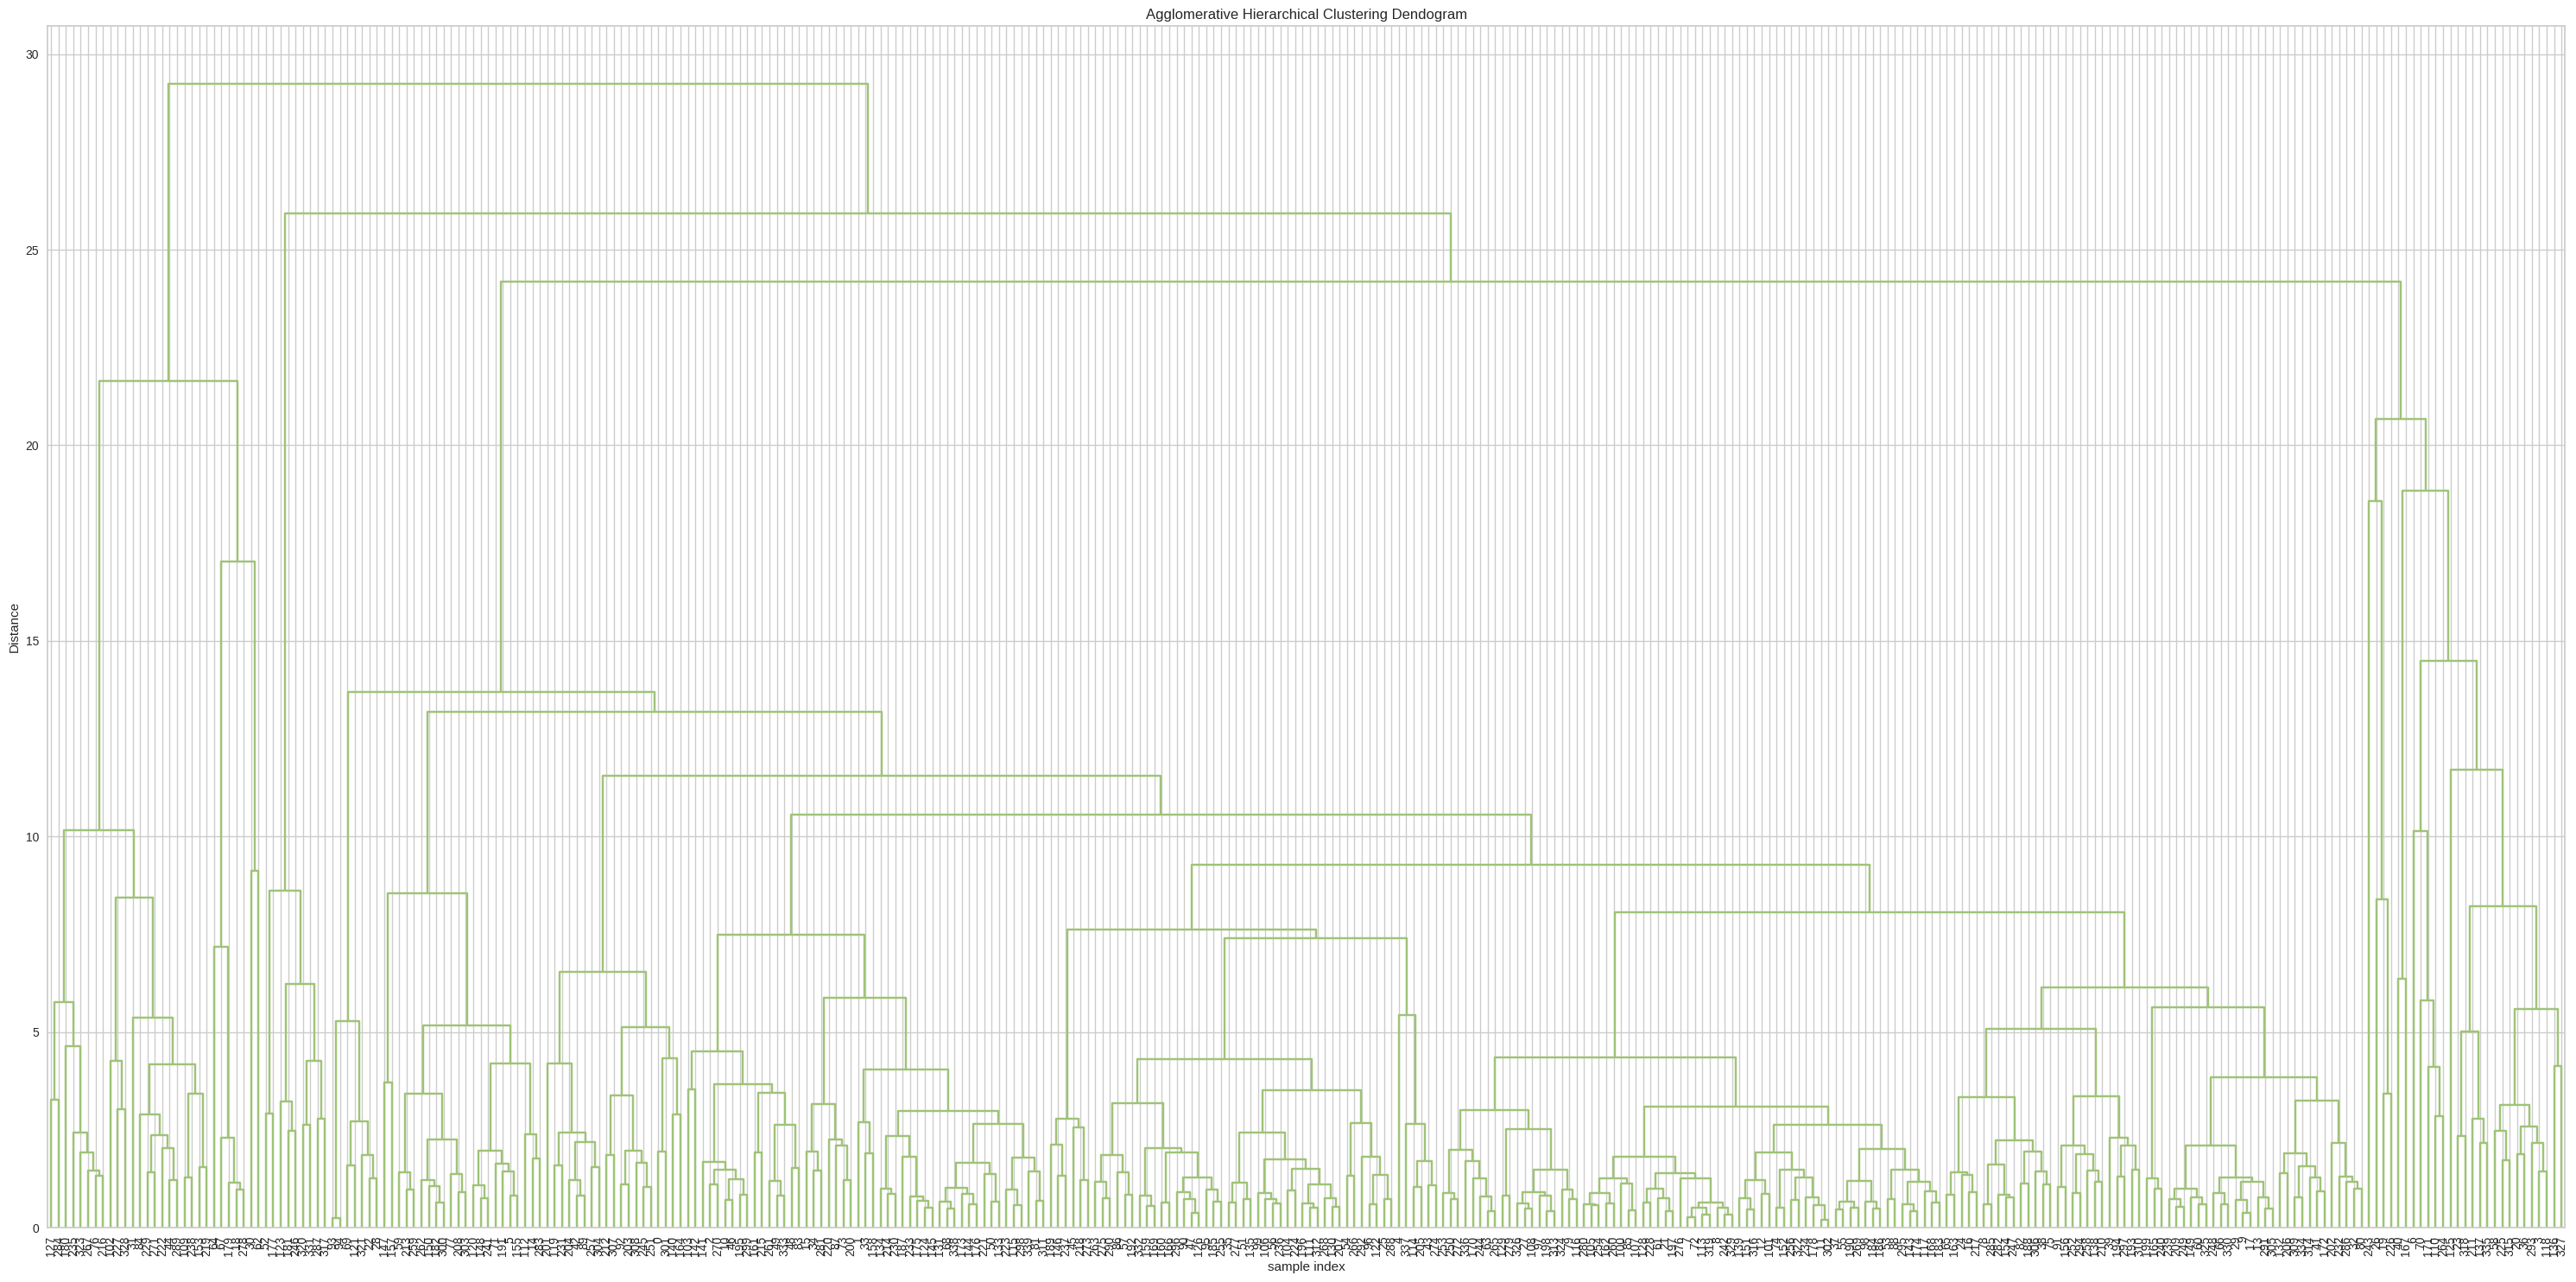

In [ ]:
plt.figure(figsize=(30, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

### Insight

  - The cophenet score using the average method appears to be the appropriate since we recorded the highest score of 0.94 and per the Dendogram, i decide to chose n_clusters=7

In [ ]:
finalmodel = AgglomerativeClustering(n_clusters=7, affinity='euclidean',  linkage='average')

In [ ]:
finalmodel.fit(stockScaled)


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=7)

In [ ]:
stockScaled['labels'] = finalmodel.labels_
stockScaled.head(10)


Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   
5      -0.451251     -1.342556   -0.016049 -0.307006   -0.232849   
6       1.998837      0.176091   -0.692132 -0.099549   -0.498664   
7      -0.384353     -0.158797   -0.679931 -0.317379   -0.620496   
8      -0.230744     -0.142338   -0.774192 -0.296633   -0.675874   
9      -0.214096     -0.087667   -0.808359 -0.265515    0.320933   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   
5      -0.125823    0.090133            0.032432   
6       0.018187   -0.228206            0.932390   
7       0.119096   -0.218177           -0.026856   
8      -0.021424    0.141806            0.053714   
9      -0.187053    0.263986            0.471769   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  labels  
0                      0.107863  -0.652487  -0.506653       6  
1                      1.250274  -0.311769  -0.504205       6  
2                      1.098021  -0.391502   0.094941       6  
3                     -0.091622   0.947148   0.424333       6  
4                      1.978399   3.293307   0.199196       6  
5                      0.048977  -0.459427   0.660752       6  
6                     -0.603923  -0.035502   9.377562       5  
7                     -0.393572  -0.360984   0.071614       6  
8                     -0.183672  -0.319668  -0.093530       6  
9                     -0.173153  -0.506408  -0.011879       6

In [ ]:
stockCluster = stockScaled.groupby(['labels'])
stockCluster.mean()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
labels                                                                  
0           -0.575803     -1.453888    3.311126  7.908297   -0.210698   
1           -0.564007      0.597207   -0.344579 -0.281074    0.669815   
2            2.513965      1.488004    0.852517 -0.369243    0.398462   
3            0.243055      1.013134   -0.347539 -0.327752    9.834905   
4           12.195670     -0.074042   -0.435986 -0.109922    1.262362   
5            1.998837      0.176091   -0.692132 -0.099549   -0.498664   
6           -0.059696     -0.011715   -0.021258 -0.041241   -0.038522   

        Net Cash Flow  Net Income  Earnings Per Share  \
labels                                                  
0           -0.693613   -5.236157           -6.778822   
1            8.592722    3.090627            0.078798   
2            0.330693   -0.306744           -0.308093   
3            0.276029    0.552725           -0.222962   
4           -0.888563    0.268653            7.192572   
5            0.018187   -0.228206            0.932390   
6           -0.049079    0.013994            0.019462   

        Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
labels                                                      
0                          -0.068025   0.635362   0.235430  
1                           2.622293  -0.428216   0.231367  
2                          -0.248951   8.318604  -0.258428  
3                           2.632871   1.067680   0.545140  
4                          -0.622886  -0.161672   0.047742  
5                          -0.603923  -0.035502   9.377562  
6                          -0.017478  -0.079517  -0.030693

In [ ]:
clust_profi = stockScaled.groupby('labels').mean()

In [ ]:
clust_profi['count_in_each_segments'] = (
    stockScaled.groupby('labels')['Price Change'].count().values
)

In [ ]:
# let's display cluster profiles
clust_profi.style.highlight_max(color="lightgreen", axis=0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

### Insights

 > K-means Clustering
   - Group 0: is made up of high Net Income shares and high Estimated Shares Outstanding
   - Group 1: is made up of the most counts
   - Group 2: is made up of the highest Current Price, Cash Ratio,	Net Cash Flow, Earnings Per Share and P/B Ratio
   - Group 3: is made up of the highest Volatility,	ROE and P/E Ratio

> Hierarchical Clustering
  - Group 0: is made up of the highest Volatility and	ROE
  - Group 1: is made up of the highest Net Cash Flow	and Net Income
  - Group 2: is made up of the highest Price Change and P/E Ratio
  - Group 3: is made up of the highest Cash Ratio and Estimated Shares Outstanding
  - Group 4: is made up of the highest Current Price and Earnings Per Share
  - Group 5: is made up of the highest P/B Ratio
  - Group 6: is made up of the most counts




## Actionable Insights and Recommendations

-

# The Group 2 of the K- means Clustering tends to be the most profitable to invest